In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
import numpy as np
import re
%matplotlib inline

In [3]:
train_tweets = pd.read_csv('D:\\Learning\\GreyAtom\\Hackathon 3\\file\\data\\train.csv')
test_tweets = pd.read_csv('D:\\Learning\\GreyAtom\\Hackathon 3\\file\\data\\test.csv')

In [4]:
test_tweets.head()

tweet_id                                              tweet
0      7506  Audience Q: What prototyping tools do you use?...
1      7992  At SXSW? Send Your Best Photos &amp; Videos to...
2       247  @mention  and here's a pic of you winning your...
3      7688  Google Marissa Mayer: mobile phone as a cursor...
4      3294    #SXSW Google maps is even cooler than I thought

In [5]:
train_tweets.shape

(7274, 3)

In [6]:
#The data has 3 columns tweed_id, sentiment, and tweet. 
#sentiment is the target variable that contains  0: Negative, 1: Neutral, 2: Positive, 3: Can't Tell
# and tweet contains the tweets that we will clean and preprocess.

In [7]:
#Combine train and test data
combi = train_tweets.append(test_tweets, ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [8]:
#Remove unwanted patterns from tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [9]:
# remove twitter handles (@user) and create a new column tidy_tweet

combi['tidy_tweet']=combi['tweet'].apply(lambda x:np.vectorize(remove_pattern)(str(x), "@[\w]*"))

In [10]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [11]:
#remove short words
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [12]:
#Remove #
combi['tidy_tweet_nohashWords'] = combi['tidy_tweet'].apply(lambda x: re.sub(r"#(\w+)", ' ', x, flags=re.MULTILINE))

In [13]:
#Extract hash words
combi['hashwords'] = combi['tidy_tweet'].apply(lambda x : ' '.join([part[1:] for part in x.split() if part.startswith('#')]))

In [14]:
combi['wc']=combi['tidy_tweet'].apply(lambda x: x.split()).apply(lambda x : len(x))

In [15]:
combi[combi.sentiment==0]

sentiment                                              tweet  tweet_id  \
3           0.0  This iPhone #SXSW app would b pretty awesome i...      4525   
24          0.0  .@mention I have a 3G iPhone. After 3 hrs twee...       634   
34          0.0  So I went the whole day w/out my laptop &amp; ...      1178   
50          0.0  RT @mention 'Google lost its way by caring too...      5058   
63          0.0  I composed a tweet so acerbic and cynical abou...      2435   
68          0.0  @mention is about to talk about the mistakes h...      3850   
80          0.0  You spent $1,000+ to come to SXSW. \r\n\r\nYou...       180   
128         0.0  My tweeting from #sxsw been pretty non existen...      4606   
142         0.0  Sitting on the floor behind a guy who's fondli...      4454   
223         0.0  &quot;No other reason for Apple's continued su...      7186   
262         0.0  Novelty of iPad news apps fades fast among #SX...      3136   
266         0.0  RT @mention I have yet to walk into a conferen...      6054   
273         0.0  Disgusted with my iPhone's battery life. Alrea...      1335   
302         0.0  Hey @mention your app won't download from the ...      3800   
309         0.0  I was really hoping #SXSW would bring an Andro...      4209   
364         0.0  @mention for the life of me, I can't get my iP...      3188   
378         0.0  Q: Why do social sites like Delicious often ha...      1095   
397         0.0  #sxsw   Tried 2 days with iPAD, w/o MacBook Pr...      7677   
427         0.0  iPhone GPS is messed up. Thinks I'm in Yonkers...      7869   
431         0.0  Lunch with @mention at #CNNGrill. View from th...      3389   
448         0.0  #sxsw #csr reporting: Janecek: Microsoft gives...      7548   
449         0.0  Pretty excited for my iPhone to stop working #...      2376   
464         0.0  #Mullenweg admits that iPhone app for Wordpres...      3220   
550         0.0  @mention Google Circles will be Lame. #sxsw &lt;3      3331   
568         0.0  more that just location, PixieEngine! RT @ment...       741   
577         0.0  at the Android party and kinda embarrassed by ...      2565   
594         0.0  LOL 2 true RT @mention It's official: people u...      2711   
611         0.0  You think there would be a #sxsw app for black...      1181   
612         0.0  New circle game? RT @mention  @mention Google ...      2648   
633         0.0  @mention  - False Alarm: Google Circles Not Co...        38   
...         ...                                                ...       ...   
6780        0.0  Navigating a crowded party sucks. But its way ...      3214   
6786        0.0  Google is not launching anything during #sxsw,...       931   
6799        0.0  RT @mention @mention  - False Alarm: Google Ci...      5089   
6850        0.0  Diller says Google TV &quot;might be run over ...      9080   
6854        0.0  Apple is opening a temporary store in Austin f...      7091   
6857        0.0  The data crunch at #SXSW is crippling Google V...      2412   
6858        0.0  Best thing I've heard this weekend at #SXSW &q...      3227   
6862        0.0  Is it just me or has the @mention client for A...      8258   
6863        0.0  Brought up how Google Maps had rerouted all im...      7303   
6868        0.0  It was awesome to hear Marissa Mayer acknowled...      3061   
6886        0.0  Mayer also admits that Google needs to &quot;s...      4828   
6891        0.0  Ha! RT @mention Google guy at #sxsw talk is ex...      2946   
6935        0.0  So we get to see google fail at social on anot...      1250   
6936        0.0  Srsly love @mention @mention promo @mention Sr...      2591   
6938        0.0  wow you suck {link} iPad #sxsw Rebecca Black #...      8649   
6944        0.0  Opened yesterday. Line too long to wait in jus...      8106   
6948        0.0  Thank you to @mention for letting me test driv...      1210   
6982        0.0  #sxsw iPhone app: control mania! Half of the s...      6999   
7000  

# Visualization

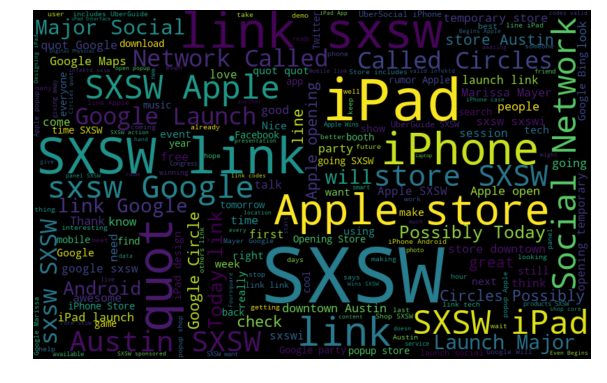

In [404]:
#Understanding the common words used in the tweets: WordCloud
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

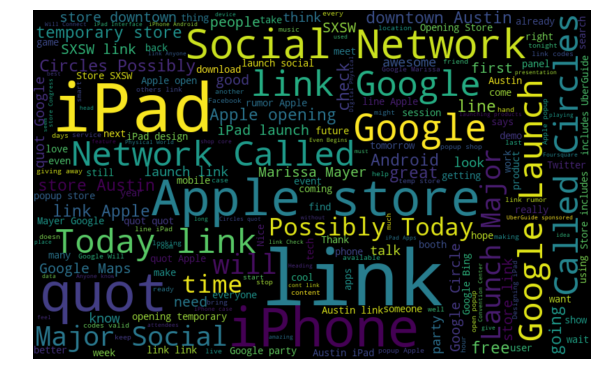

In [409]:
#Understanding the common words used in the tweets excluding hash words: WordCloud
all_words = ' '.join([text for text in combi['tidy_tweet_nohashWords']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

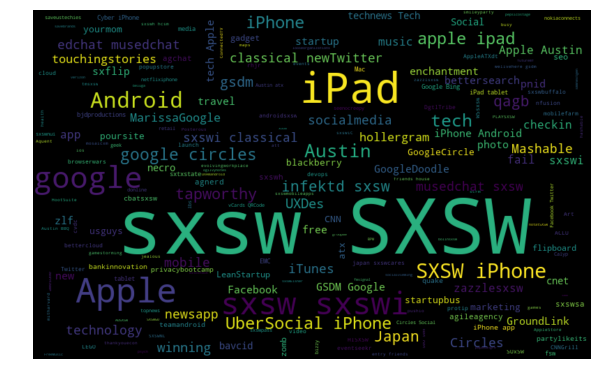

In [425]:
#Understanding the hash words used in the tweets: WordCloud
all_words = ' '.join([text for text in combi['hashwords']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

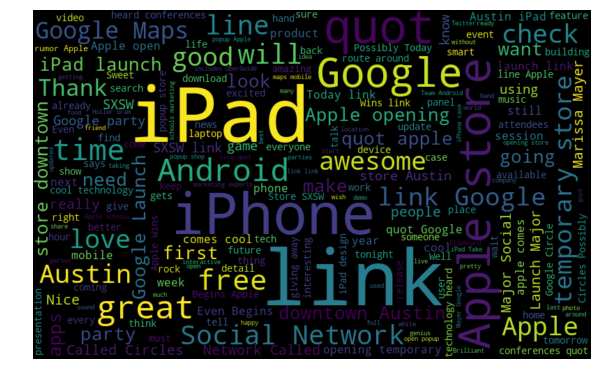

In [408]:
#Words in positive tweets
positive_words =' '.join([text for text in combi['tidy_tweet_nohashWords'][combi['sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

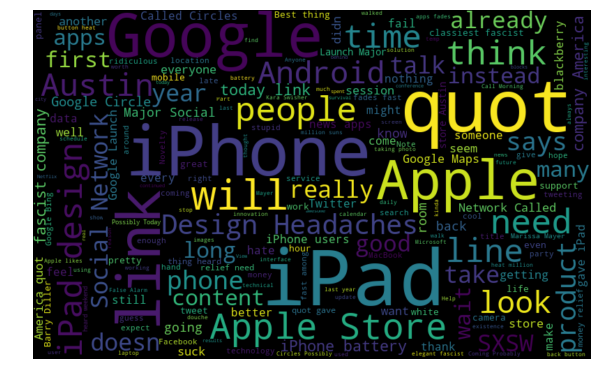

In [407]:
#Words in negative tweets
negative_words =' '.join([text for text in combi['tidy_tweet_nohashWords'][combi['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

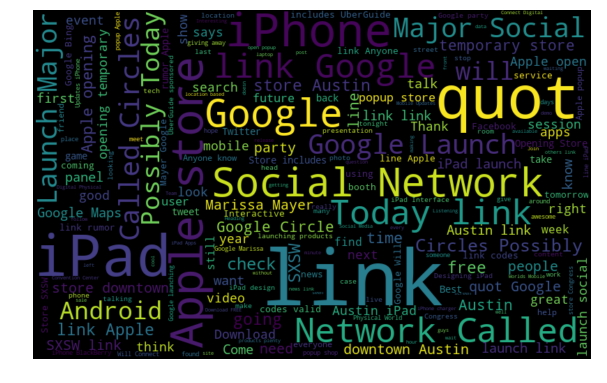

In [320]:
#Words in neutral tweets
neutral_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Impact of hashtags

In [426]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [458]:
# extracting hashtags from positive tweets

HT_positive = hashtag_extract(combi['tweet'][combi['sentiment'] == 2])

# extracting hashtags from negative tweets
HT_negative = hashtag_extract(combi['tweet'][combi['sentiment'] == 0])
# extracting hashtags from neutral tweets
#HT_neutral = hashtag_extract(combi['tweet'][combi['sentiment'] == 1])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])
#HT_neutral = sum(HT_neutral,[])

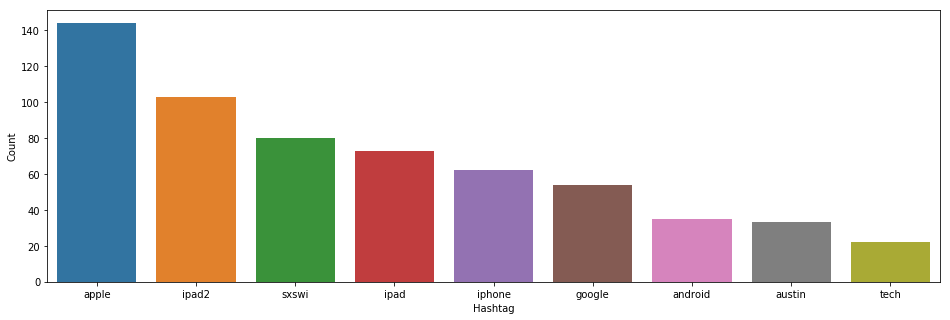

In [480]:
#Positive tweets
a = nltk.FreqDist(list(map(lambda x:x.lower(),HT_positive)))
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d[1:], x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

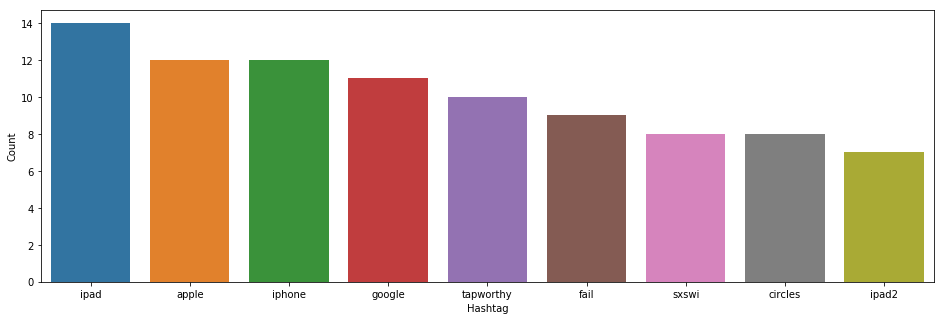

In [483]:
#negative words
b = nltk.FreqDist(list(map(lambda x:x.lower(),HT_negative)))
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e[1:], x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Text(0.5, 0, 'tweet_id')

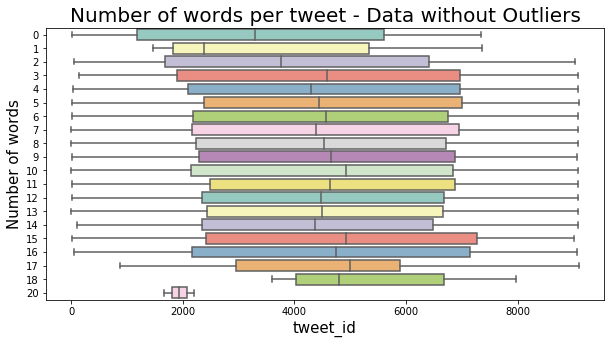

In [255]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.boxplot(y = 'wc', x = 'tweet_id', data = combi, orient="h", palette="Set3")
plt.title('Number of words per tweet - Data without Outliers', fontsize = 20)
plt.ylabel("Number of words", fontsize = 15)
plt.xlabel("tweet_id", fontsize = 15)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.boxplot(x = 'wc', y = 'tweet_id', data = combi, orient="h")
plt.title('Word Count per Post - Full Data w/Outliers', fontsize = 20)
plt.xlabel("Word Count", fontsize = 15)
plt.ylabel("tweet_id", fontsize = 15)

fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.boxplot(x = 'wc', y = 'tweet_id', data = combi, orient="h")
plt.title('Word Count per Post - Data without Outliers', fontsize = 20)
plt.xlabel("Word Count", fontsize = 15)
plt.ylabel("tweet_id", fontsize = 15)

In [384]:
#stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = combi['tidy_tweet_nohashWords'].apply(lambda x: x.split()).apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [defin, languag, touch, with, differ, dialect,...
1    [learn, googl, doodl, doodl, should, light, fu...
2    [most, your, face, steal, show, quot, appl, sc...
3    [thi, iphon, would, pretti, awesom, didn, cras...
4    [line, outsid, appl, store, austin, wait, ipad...
Name: tidy_tweet_nohashWords, dtype: object

In [387]:
#stich back the tokens
for i in range(len(tokenized_tweet)-1):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

# Feature extraction

In [16]:
#Bag of words

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [17]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

# Model building

In [18]:
#Using BOW features
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:7274,:]
test_bow = bow[7274:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_tweets['sentiment'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int, average='weighted') # calculating f1 score

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4680389307056185

In [529]:
prediction.max()

0.9344671926237008

In [19]:
#for test data
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_tweets['sentiment'] = test_pred_int
submission = test_tweets[['tweet_id','sentiment']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [26]:
#for test data
test_pred = lreg.predict(test_bow)
test_tweets['sentiment'] = test_pred
submission = test_tweets[['tweet_id','sentiment']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [27]:
sub_tweets = pd.read_csv('sub_lreg_bow.csv')
sub_tweets.head()

tweet_id  sentiment
0      7506          1
1      7992          1
2       247          1
3      7688          2
4      3294          2

In [21]:
#TF_IDF features - model building
train_tfidf = tfidf[:7274,:]
test_tfidf = tfidf[7274:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)
prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int, average='micro')

0.587265231333028

In [22]:
#for test data
test_pred = lreg.predict_proba(test_tfidf)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_tweets['sentiment'] = test_pred_int
submission = test_tweets[['tweet_id','sentiment']]
submission.to_csv('sub_lreg_tfidf.csv', index=False) # writing data to a CSV file

In [24]:
#for test data
test_pred = lreg.predict(test_tfidf)
test_tweets['sentiment'] = test_pred
submission = test_tweets[['tweet_id','sentiment']]
submission.to_csv('sub_lreg_tfidf.csv', index=False) # writing data to a CSV file

In [25]:
sub_tweets = pd.read_csv('sub_lreg_tfidf.csv')
sub_tweets.head()

tweet_id  sentiment
0      7506          1
1      7992          1
2       247          1
3      7688          2
4      3294          2

# BOW + SMOTE

In [571]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==2)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==3)))

sm = SMOTE(random_state=2)
X_train_bow_res, y_train_res = sm.fit_sample(xtrain_bow, ytrain.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_bow_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==0)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==3)))

Before OverSampling, counts of label '0': 335 

Before OverSampling, counts of label '0': 3007 

Before OverSampling, counts of label '0': 1663 

Before OverSampling, counts of label '0': 86 

After OverSampling, the shape of train_X: (12028, 1000)
After OverSampling, the shape of train_y: (12028,) 

After OverSampling, counts of label '1': 3007
After OverSampling, counts of label '0': 3007
After OverSampling, counts of label '1': 3007
After OverSampling, counts of label '0': 3007


In [572]:
lreg = LogisticRegression()
lreg.fit(X_train_bow_res, y_train_res) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int, average='weighted') # calculating f1 score

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



0.4386972949268091

# TFIDF + SMOTE

In [575]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==2)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==3)))

sm = SMOTE(random_state=2)
X_train_tfidf_res, y_train_res = sm.fit_sample(xtrain_tfidf, ytrain.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_tfidf_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res==3)))

Before OverSampling, counts of label '0': 335 

Before OverSampling, counts of label '0': 3007 

Before OverSampling, counts of label '0': 1663 

Before OverSampling, counts of label '0': 86 

After OverSampling, the shape of train_X: (12028, 1000)
After OverSampling, the shape of train_y: (12028,) 

After OverSampling, counts of label '0': 3007
After OverSampling, counts of label '1': 3007
After OverSampling, counts of label '2': 3007
After OverSampling, counts of label '3': 3007


In [576]:
lreg.fit(X_train_tfidf_res, y_train_res)
prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int, average='micro')

0.47503435639028857

# MultilabelBinarizer - yet to work

In [543]:
#Using BOW features
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:7274,:]
test_bow = bow[7274:,:]
from sklearn import metrics
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_tweets['sentiment'], random_state=42, test_size=0.3)

lb = MultiLabelBinarizer()
Y = lb.fit_transform(ytrain)
Y_test = lb.fit_transform(yvalid)

classifier = Pipeline([
('vectorizer', CountVectorizer()),
('tfidf', TfidfTransformer()),
('clf', OneVsRestClassifier(LinearSVC()))])

classifier.fit(xtrain_bow, Y)
predicted = classifier.predict(xvalid_bow)


print("Accuracy Score: ",accuracy_score(yvalid, predicted))


#prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
#prediction_int = prediction_int.astype(np.int)

#f1_score(yvalid, prediction, average='micro') # calculating f1 score

TypeError: 'int' object is not iterable

In [ ]:
#Using BOW features
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:7274,:]
test_bow = bow[7274:,:]
from sklearn import metrics
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_tweets['sentiment'], random_state=42, test_size=0.3)

lb = MultiLabelBinarizer()
Y = lb.fit_transform(ytrain)
Y_test = lb.fit_transform(yvalid)

classifier = Pipeline([
('vectorizer', CountVectorizer()),
('tfidf', TfidfTransformer()),
('clf', OneVsRestClassifier(LinearSVC()))])

classifier.fit(xtrain_bow, Y)
predicted = classifier.predict(xvalid_bow)


print("Accuracy Score: ",accuracy_score(yvalid, predicted))


# Trying with logistic regression on combi

In [567]:
#Using BOW features
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_tweets1 = combi.iloc[:7274,1:]
test_tweets1 = combi.iloc[7274:,:]
from sklearn import metrics
# splitting data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(train_tweets1, train_tweets1['sentiment'], random_state=42, test_size=0.3)

lreg = LogisticRegression(solver='lbfgs')
lreg.fit(X_train, y_train) # training the model

y_pred = lreg.predict_proba(X_test) # predicting on the validation set
count_misclassified = (y_test != prediction).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))



#prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
#prediction_int = prediction_int.astype(np.int)

#f1_score(yvalid, prediction, average='micro') # calculating f1 score

KeyError: 'sentiment'

In [568]:
train_tweets1.head()

tweet  tweet_id  \
0  #sxswnui #sxsw #apple defining language of tou...      1701   
1  Learning ab Google doodles! All doodles should...      1851   
2  one of the most in-your-face ex. of stealing t...      2689   
3  This iPhone #SXSW app would b pretty awesome i...      4525   
4  Line outside the Apple store in Austin waiting...      3604   

                                          tidy_tweet  \
0  #sxswnui #sxsw #apple defining language touch ...   
1  Learning Google doodles doodles should light f...   
2  most your face stealing show quot #SXSW Apple ...   
3  This iPhone #SXSW would pretty awesome didn cr...   
4  Line outside Apple store Austin waiting iPad #...   

                              tidy_tweet_nohashWords  \
0        defining language touch with different d...   
1  Learning Google doodles doodles should light f...   
2  most your face stealing show quot   Apple scho...   
3  This iPhone   would pretty awesome didn crash ...   
4  Line outside Apple store Austin waiting iPad  ...   

                   hashwords  wc  \
0         sxswnui sxsw apple  11   
1          GoogleDoodle sxsw  14   
2                       SXSW  12   
3  SXSW Fuckit Illmakeitwork  15   
4                       SXSW   9   

                                       nonemojiTweet                 verbs  \
0  #sxswnui #sxsw #apple defining language touch ...  [defining, becoming]   
1  Learning Google doodles doodles should light f...     [Learning, light]   
2  most your face stealing show quot #SXSW Apple ...      [stealing, quot]   
3  This iPhone #SXSW would pretty awesome didn cr...    [pretty, extended]   
4  Line outside Apple store Austin waiting iPad #...             [waiting]   

                                               nouns adjectives  
0                               [language, dialects]         []  
1  [Google, doodles, doodles, exceptions, occasions]         []  
2        [face, show, Apple, schools, experts, link]         []  
3              [iPhone, didn, crash, mins, browsing]         []  
4           [Line, Apple, store, Austin, iPad, link]         []

# ANother model using ngrams option in tfid - didnotwork

In [525]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(combi.tidy_tweet).toarray()
labels = combi.sentiment
features.shape

(9093, 3891)

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

In [129]:
test_tweets.head()

tweet_id                                              tweet  sentiment
0      7506  Audience Q: What prototyping tools do you use?...          1
1      7992  At SXSW? Send Your Best Photos &amp; Videos to...          1
2       247  @mention  and here's a pic of you winning your...          1
3      7688  Google Marissa Mayer: mobile phone as a cursor...          0
4      3294    #SXSW Google maps is even cooler than I thought          1

In [130]:
test_pred

array([[0.04204934, 0.8230331 , 0.11257685, 0.02234071],
       [0.00761752, 0.49424404, 0.47928057, 0.01885788],
       [0.01005575, 0.46789814, 0.51745359, 0.00459251],
       ...,
       [0.02783288, 0.56077105, 0.39886947, 0.0125266 ],
       [0.29108482, 0.21108187, 0.33513195, 0.16270136],
       [0.02340419, 0.87659709, 0.08506584, 0.01493288]])

In [221]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...


In [222]:
sia_table = []
for i in combi['tidy_tweet']:
    sia_scores = {}
    sia_scores['sia_positive'] = sia.polarity_scores(i)['pos']
    sia_scores['sia_negative'] = sia.polarity_scores(i)['neg']
    sia_scores['sia_neutral'] = sia.polarity_scores(i)['neu']
    sia_scores['sia_compound'] = sia.polarity_scores(i)['compound']

    sia_table.append(sia_scores)
    
#print (sia_table)

In [224]:
sia_table = pd.DataFrame(sia_table)
sia_table['tweet_id'] = combi['tweet_id']
sia_table['tidy_tweet'] = combi['tidy_tweet']
sia_table['word_count'] = combi['wc']
sia_table['tweet'] = combi['tweet']
sia_table['sentiment']=combi['sentiment']
sia_table.head()

sia_compound  sia_negative  sia_neutral  sia_positive  tweet_id  \
0        0.0000         0.000        1.000         0.000      1701   
1        0.7650         0.000        0.591         0.409      1851   
2       -0.6077         0.265        0.735         0.000      2689   
3        0.6808         0.123        0.545         0.332      4525   
4        0.0000         0.000        1.000         0.000      3604   

                                          tidy_tweet  word_count  \
0  #sxswnui #sxsw #apple defining language touch ...          11   
1  Learning Google doodles doodles should light f...          14   
2  most your face stealing show quot #SXSW Apple ...          12   
3  This iPhone #SXSW would pretty awesome didn cr...          15   
4  Line outside Apple store Austin waiting iPad #...           9   

                                               tweet  sentiment  
0  #sxswnui #sxsw #apple defining language of tou...        1.0  
1  Learning ab Google doodles! All doodles should...        1.0  
2  one of the most in-your-face ex. of stealing t...        2.0  
3  This iPhone #SXSW app would b pretty awesome i...        0.0  
4  Line outside the Apple store in Austin waiting...        1.0

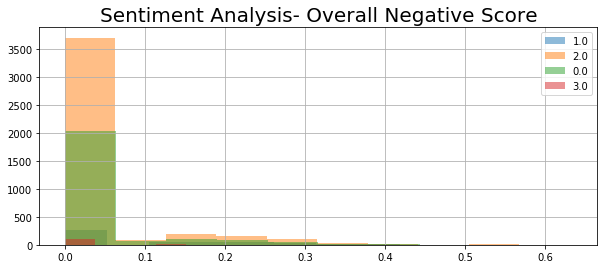

In [225]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
sia_table.groupby('sentiment')['sia_negative'].hist(alpha=0.5, ax=ax)
ax.legend(sia_table['sentiment'].unique())
plt.title('Sentiment Analysis- Overall Negative Score', fontsize = 20)
plt.show()

# Practice

In [523]:
from nltk import word_tokenize, pos_tag

combi['verbs'] = combi['tidy_tweet_nohashWords'].apply(lambda x: [token for token, pos in pos_tag(word_tokenize(x)) if pos.startswith('V')])
combi['nouns'] = combi['tidy_tweet_nohashWords'].apply(lambda x: [token for token, pos in pos_tag(word_tokenize(x)) if pos.startswith('N')])
combi['adjectives'] = combi['tidy_tweet_nohashWords'].apply(lambda x: [token for token, pos in pos_tag(word_tokenize(x)) if pos.startswith('A')])

In [524]:
combi.head()

sentiment                                              tweet  tweet_id  \
0        1.0  #sxswnui #sxsw #apple defining language of tou...      1701   
1        1.0  Learning ab Google doodles! All doodles should...      1851   
2        2.0  one of the most in-your-face ex. of stealing t...      2689   
3        0.0  This iPhone #SXSW app would b pretty awesome i...      4525   
4        1.0  Line outside the Apple store in Austin waiting...      3604   

                                          tidy_tweet  \
0  #sxswnui #sxsw #apple defining language touch ...   
1  Learning Google doodles doodles should light f...   
2  most your face stealing show quot #SXSW Apple ...   
3  This iPhone #SXSW would pretty awesome didn cr...   
4  Line outside Apple store Austin waiting iPad #...   

                              tidy_tweet_nohashWords  \
0        defining language touch with different d...   
1  Learning Google doodles doodles should light f...   
2  most your face stealing show quot   Apple scho...   
3  This iPhone   would pretty awesome didn crash ...   
4  Line outside Apple store Austin waiting iPad  ...   

                   hashwords  wc  \
0         sxswnui sxsw apple  11   
1          GoogleDoodle sxsw  14   
2                       SXSW  12   
3  SXSW Fuckit Illmakeitwork  15   
4                       SXSW   9   

                                       nonemojiTweet                 verbs  \
0  #sxswnui #sxsw #apple defining language touch ...  [defining, becoming]   
1  Learning Google doodles doodles should light f...     [Learning, light]   
2  most your face stealing show quot #SXSW Apple ...      [stealing, quot]   
3  This iPhone #SXSW would pretty awesome didn cr...    [pretty, extended]   
4  Line outside Apple store Austin waiting iPad #...             [waiting]   

                                               nouns adjectives  
0                               [language, dialects]         []  
1  [Google, doodles, doodles, exceptions, occasions]         []  
2        [face, show, Apple, schools, experts, link]         []  
3              [iPhone, didn, crash, mins, browsing]         []  
4           [Line, Apple, store, Austin, iPad, link]         []

In [522]:
import nltk
unique_frequencies = dict()
total_frequencies = dict()
for readme in combi.tidy_tweet:
    readme = re.sub(r"#(\w+)", ' ', readme, flags=re.MULTILINE)
    words = nltk.word_tokenize(readme)
    fdist = nltk.FreqDist(words)
    unicfdist = nltk.FreqDist(set(words))
    for word, freq in fdist.most_common(50):
        total_frequencies[word] +=fdist[word]+ freq 
        unique_frequencies[word]+= unicfdist[word] +1 

KeyError: 'defining'

In [83]:
for i in range(len(combi.index)):
    if(combi.loc[i]["sentiment"]==2):
        pos_text+=combi.loc[i]["tidy_tweet"]
    elif(combi.loc[i]["sentiment"]==-0):
        neg_text+=combi.loc[i]["tidy_tweet"]
    else:
        neut_text+=combi.loc[i]["tidy_tweet"]

NameError: name 'neut_text' is not defined

In [507]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#for tweet in combi.tidy_tweet:
tokenized_word = word_tokenize(combi.tidy_tweet.to_string())
stop_words=set(stopwords.words("english"))
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w.lower())
#print(filtered_sent)
fdist1 = FreqDist(filtered_sent)
fd1 = pd.DataFrame(fdist1.most_common(20),                    \
columns = ["Word","Frequency"]).reindex()

import plotly.express as px
fig = px.bar(fd1[2:], x="Word", y="Frequency")
fig.update_traces(marker_color='rgb(240,128,128)',          \
    marker_line_color='rgb(8,48,107)',                      \
    marker_line_width=1.5, opacity=0.8)
fig.show()

In [510]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#for tweet in combi.tidy_tweet:
tokenized_word = word_tokenize(combi.tidy_tweet_nohashWords.to_string())
stop_words=set(stopwords.words("english"))
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w.lower())
#print(filtered_sent)
fdist1 = FreqDist(filtered_sent)
fd1 = pd.DataFrame(fdist1.most_common(20),                    \
columns = ["Hash_Word","Frequency"]).reindex()

import plotly.express as px
fig = px.bar(fd1[1:], x="Hash_Word", y="Frequency")
fig.update_traces(marker_color='rgb(240,128,128)',          \
    marker_line_color='rgb(8,48,107)',                      \
    marker_line_width=1.5, opacity=0.8)
fig.show()

In [511]:
def deEmojify(text):
    if text:
        return text.encode('ascii', 'ignore').decode('ascii')
    else:
        return None

In [513]:
combi['nonemojiTweet'] = combi['tidy_tweet'].apply(deEmojify)

In [520]:
combi[combi.tweet_id==3967].tidy_tweet.to_string()

'62    LaunchRock Vencorps Want Give Best Startups #S...'

In [521]:
import nltk
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
bi_dict = dict()
bg_measures = BigramAssocMeasures()
for readme in combi.tidytweet:
    words = nltk.word_tokenize(readme)
    bi_finder = BigramCollocationFinder.from_words(words)
    bi_collocs = bi_finder.nbest(bg_measures.likelihood_ratio, 10)
    for colloc in bi_collocs:
        bi_dict[colloc] += 1

AttributeError: 'DataFrame' object has no attribute 'tidytweet'

In [116]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#for tweet in combi.tidy_tweet:
tokenized_word = word_tokenize(combi.nouns.to_string())
stop_words=set(stopwords.words("english"))
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w.lower())
#print(filtered_sent)
fdist1 = FreqDist(filtered_sent)
fd1 = pd.DataFrame(fdist1.most_common(20),                    \
columns = ["Brand","Frequency"]).reindex()

In [120]:
import plotly.express as px
fig = px.bar(fd1[5:], x="Brand", y="Frequency")
fig.update_traces(marker_color='rgb(240,128,128)',          \
    marker_line_color='rgb(8,48,107)',                      \
    marker_line_width=1.5, opacity=0.8)
fig.show()

In [141]:
from nltk import word_tokenize
from nltk.collocations import BigramCollocationFinder
text = combi.tidy_tweet.to_string().lower()
finder = BigramCollocationFinder.from_words(word_tokenize(text))
finder.apply_ngram_filter

<bound method AbstractCollocationFinder.apply_ngram_filter of <nltk.collocations.BigramCollocationFinder object at 0x000002672D47D1D0>>

In [142]:
finder.ngram_fd

FreqDist({('#', 'sxsw'): 4210, ('apple', 'store'): 580, ('sxsw', '#'): 424, ('link', '#'): 422, ('sxsw', 'link'): 402, ('social', 'network'): 359, ('google', 'launch'): 316, ('#', 'ipad'): 289, ('#', 'apple'): 286, ('launch', 'major'): 280, ...})

In [147]:
from textblob import TextBlob 
combi['polarity'] = combi['tidy_tweet'].map(lambda text: TextBlob(text).sentiment.polarity)
combi['tweet_len'] = combi['tidy_tweet'].astype(str).apply(len)
combi['word_count'] = combi['tidy_tweet'].apply(lambda x: len(str(x).split()))
combi.head()

sentiment                                              tweet  tweet_id  \
0        1.0  #sxswnui #sxsw #apple defining language of tou...      1701   
1        1.0  Learning ab Google doodles! All doodles should...      1851   
2        2.0  one of the most in-your-face ex. of stealing t...      2689   
3        0.0  This iPhone #SXSW app would b pretty awesome i...      4525   
4        1.0  Line outside the Apple store in Austin waiting...      3604   

                                          tidy_tweet  wc  \
0  #sxswnui #sxsw #apple defining language touch ...  11   
1  Learning Google doodles doodles should light f...  14   
2  most your face stealing show quot #SXSW Apple ...  12   
3  This iPhone #SXSW would pretty awesome didn cr...  15   
4  Line outside Apple store Austin waiting iPad #...   9   

                  verbs                                              nouns  \
0  [defining, becoming]                        [apple, language, dialects]   
1     [Learning, light]  [Google, doodles, doodles, exceptions, occasio...   
2      [stealing, quot]  [face, show, SXSW, Apple, schools, experts, link]   
3              [pretty]  [iPhone, SXSW, didn, crash, mins, browsing, Fu...   
4             [waiting]           [Line, Apple, store, Austin, SXSW, link]   

  adjectives  polarity  word_count  tweet_len  
0         []   0.15000          11         86  
1         []   0.38125          14        119  
2         []   0.50000          12         71  
3         []   0.62500          15        108  
4         []   0.00000           9         55

In [148]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = combi.loc[combi.polarity == 1, ['tidy_tweet']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

Those #SXSW check Holler Gram ipad from link covered awesome sauce
experimenting tinkering again like nineties quot Best viewed iPad best viewed Internet Explorer quot #sxsw
Best thing heard this wknd #SXSW quot gave iPad money #Japan relief need iPad quot
awesome iphones wifi frozen #sxsw #tmobile teathering Android works like charm
Best thing heard this weekend #SXSW quot gave iPad money #Japan relief need iPad quot


In [152]:
print('5 reviews with the most negative polarity: \n')
cl = combi.loc[combi.polarity <0, ['tidy_tweet']].sample(5).values
for c in cl:
    print(c[0])

5 reviews with the most negative polarity: 

Sketchily lurking #sxsw concert iPhone business with HARD read massive announcement deadline #lovemyjob
Anyone down #SXSW wanna bring back Windows Foam link #microsoft
Pollak having much trouble sell through apple #sxswbigbrands #sxsw
most dangerous IPhone apps link
Just google speak creating search engines recognize pictures Artificial intelligence here #SXSW


In [154]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [158]:
combi['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

pol_dist = pd.DataFrame(combi.groupby('polarity')['tweet'].count())

In [187]:
pol_dist.index

Float64Index([               -1.0,                -0.9,                -0.8,
              -0.7999999999999999,               -0.75, -0.7142857142857143,
                             -0.7,             -0.6875, -0.6666666666666666,
                            -0.65,
              ...
                             0.75,  0.7666666666666666,                0.78,
               0.7999999999999999,                 0.8,                0.85,
               0.8500000000000001,                 0.9,  0.9099999999999999,
                              1.0],
             dtype='float64', name='polarity', length=556)

In [191]:
pol_dist.head()

tweet
polarity       
-1.00        12
-0.90         1
-0.80        15
-0.80         3
-0.75         2

In [192]:
blob_object = TextBlob(combi.tidy_tweet.to_string())

In [207]:
for words, tag in blob_object.tags:
    print (words, tag)

0 CD
sxswnui JJ
sxsw JJ
apple NN
defining VBG
language NN
touch NN
1 CD
Learning NNP
Google NNP
doodles VBZ
doodles NNS
should MD
light VB
f NNS
2 CD
most JJS
your PRP$
face NN
stealing VBG
show NN
quot JJ
SXSW NNP
Apple NNP
3 CD
This DT
iPhone NN
SXSW NNP
would MD
pretty VB
awesome JJ
didn NN
cr NN
4 CD
Line NNP
outside IN
Apple NNP
store NN
Austin NNP
waiting VBG
iPad JJ
5 CD
technews NNS
lone VBP
dude JJ
awaits NNS
iPad VBP
Apple NNP
SXSW NNP
sto NN
6 CD
SXSW NNP
Tips NNP
Prince NNP
Videos NNP
Shopping VBG
With IN
Zuckerbe NNP
7 CD
user JJ
UberSocial JJ
iPhone NN
Store NNP
includes VBZ
UberGu NNP
8 CD
Free JJ
SXSW NNP
sampler NN
iTunes NNS
link VBP
FreeMusic JJ
9 CD
think NN
might MD
weekend NN
without IN
seeing VBG
same JJ
iPad JJ
c NN
10 CD
Official NNP
SXSW NNP
SXSW NNP
hmiiGa NN
android JJ
iphone NN
11 CD
official JJ
buying NN
iPad NN
SXSW NNP
elevate VBP
12 CD
They PRP
giving VBG
away RB
iPad JJ
boxes NNS
books NNS
sxsw RB
techenvy NN
13 CD
officially RB
SXSW NNP
Come NNP
Grill

apple NN
store NN
wait VBP
iPad NN
they PRP
repl VBP
123 CD
Google NNP
Bing NNP
search NN
smackdown JJ
panel NN
giant NN
room NN
124 CD
Lots NNS
chatter VBP
around IN
Google NNP
social JJ
network NN
Circ NNP
125 CD
Watching VBG
talk NN
hired VBD
Jony NNP
into IN
Apple NNP
SXSW NNP
ind NN
126 CD
Sound NNP
Voice NNP
shot VBD
exploiting VBG
Apple NNP
Best NNP
return NN
127 CD
Cameron NNP
Sinclair NNP
Spearheads NNP
Japan NNP
Disaster NNP
Rel NNP
128 CD
tweeting VBG
from IN
sxsw NN
been VBN
pretty JJ
existent JJ
today NN
129 CD
Arrived NNP
Google NNP
SXSW NNP
party NN
Awesome NNP
130 CD
iPad JJ
Lounge NNP
Recharge NNP
while IN
Art NNP
From NNP
iPad NN
sh NN
131 CD
Apple NNP
Opening NNP
Store NNP
Austin NNP
Sixth NNP
Congress NNP
SXS NNP
132 CD
virtualwallet NN
sxsw JJ
paypal JJ
physical JJ
goods NNS
a DT
133 CD
Original JJ
products NNS
device RB
nuts RB
sxsw JJ
iPad NN
134 CD
SXSW NNP
Novelty NNP
iPad JJ
news NN
apps NN
fades NNS
fast VBP
among IN
135 CD
Juts NNP
time NN
SXSW NNP
Group NNP

Find NNP
could MD
some DT
tech JJ
prizes NNS
such JJ
257 CD
Tried NNP
initiate NN
carpooling VBG
ridonkulous JJ
taxi NN
lin NN
258 CD
Here RB
free JJ
sampler NN
celebrate NN
SXSW NNP
this DT
year NN
in IN
259 CD
Food NNP
Thought NNP
juxtaposed VBD
iPad JJ
SXSW NNP
rocking VBG
Lyb NNP
260 CD
free JJ
iPad NN
from IN
webdoc JJ
sxsw JJ
261 CD
ironic JJ
been VBN
usurped JJ
iPad NN
hipster NN
geek JJ
start NN
ch NN
262 CD
Novelty NNP
iPad JJ
news NN
apps NN
fades NNS
fast VBP
among IN
SXSW NNP
263 CD
Android NNP
party NN
SxSW NNP
Lustre NNP
Pearl NNP
others NNS
link VBP
264 CD
Design NNP
iPad NN
like IN
design NN
class NN
Will NNP
someone NN
giv NN
265 CD
quot NNS
Google NNP
products NNS
need VBP
condensed VBN
quot JJ
Meri NNP
266 CD
have VBP
walk VBN
into IN
conference NN
room NN
where WRB
doesn NN
loo NN
267 CD
Apple NNP
ehPhone NN
available JJ
Only RB
Canada NNP
SXSW NNP
App NNP
268 CD
iPad JJ
Lounge NNP
Free NNP
daily RB
sxsw JJ
free JJ
coffee NN
iPa NN
269 CD
Queueing VBG
ipads NNS
inst

413 CD
billion CD
miles NNS
year NN
driven RB
with IN
Google NNP
Navigati NNP
414 CD
Google NNP
Maps NNP
usage NN
mobile JJ
million CD
mobile JJ
users NNS
415 CD
Google NNP
Circles NNP
indeed RB
going VBG
SXSW NNP
They PRP
will MD
li VB
416 CD
Walkin NNP
down RB
street RB
navigating JJ
Google NNP
tweeting NN
417 CD
About IN
hear JJ
quot NN
Designing NNP
iPad NN
Interfaces NNP
Navi NNP
418 CD
sxsw JJ
life NN
gives VBZ
food NN
poisoning VBG
pitch NN
food NN
poi NN
419 CD
Gets NNS
Tattooed VBN
with IN
Company NNP
Logo NNP
iPad NN
link NN
SXSW NNP
420 CD
Barry NNP
Diller NNP
Newsbeast NNP
Merger NNP
Might NNP
Work NNP
Barry NNP
421 CD
love NN
Google NNP
said VBD
quot JJ
want NN
know VBP
quot RB
sxsw JJ
422 CD
stores NNS
popping VBG
everywhere RB
Confirmed VBN
Apple NNP
stor NN
423 CD
Egyptian JJ
content NN
flood NN
quot NN
Google NNP
more JJR
server NN
424 CD
Dang NNP
touched VBD
iPad NN
WANT NNP
sigh JJ
SXSW NNP
425 CD
Unloading NNP
iPads NNS
link VBP
sxsw JJ
apple NN
ipad JJ
426 CD
Apple

stro NN
573 CD
spotted VBD
Dennis NNP
Crowley NNP
founder NN
talking VBG
Google NNP
574 CD
iPad NN
been VBN
purchased VBN
sunny JJ
square RB
good JJ
SXSW NNP
575 CD
Google NNP
Launch NNP
Major NNP
Social NNP
Network NNP
Called VBD
Circ NNP
576 CD
Just NNP
nick JJ
time NN
your PRP$
iphone NN
eventseekr JJ
SXSW NNP
577 CD
Android NNP
party NN
kinda NN
embarrassed VBD
iPhone RB
SXSW NNP
578 CD
There EX
great JJ
festival JJ
app JJ
sxsw NN
featured VBD
store NN
579 CD
Definitely RB
Yobongo JJ
Real JJ
time NN
chat WP
SXSW NNP
going VBG
580 CD
attended VBD
beevil JJ
hear JJ
criticism NN
Google NNP
ways NNS
im VBP
581 CD
Well NNP
hello RB
SXSW NNP
Here RB
free JJ
sampler NN
celebrate NN
f NN
582 CD
Google NNP
Launch NNP
Major NNP
Social NNP
Network NNP
Called VBD
Circ NNP
583 CD
atx RB
sxsw NN
Just NNP
found VBD
Apple NNP
store NN
scheduled VBD
cl NNS
584 CD
Google NNP
Launch NNP
Major NNP
Social NNP
Network NNP
Called VBD
Circ NNP
585 CD
Temp NNP
Apple NNP
store NN
Austin NNP
quite RB
iPAD NN

m NN
683 CD
Design NNP
iPad NN
like IN
design NN
class NN
Will NNP
someone NN
giv NN
684 CD
neither CC
SXSW NNP
buying VBG
iPad NN
today NN
feel VBP
like IN
geek NN
685 CD
were VBD
SXSW NNP
could MD
spend VB
Teaching NNP
Theater NNP
alone RB
686 CD
Nope NNP
seems VBZ
Google NNP
Circles NNP
launch NN
today NN
link VBP
sxsw JJ
687 CD
left VBD
WHITE NNP
iPhone NN
Austin NNP
SXSW NNP
Internet NNP
please NN
688 CD
Nice NNP
that IN
iPhone NN
behaving VBG
today NN
Crashes NNP
yester NN
689 CD
quot NN
Everyone NN
here RB
already RB
quot JJ
anti NNS
theft VBD
pro JJ
690 CD
Apple NNP
open JJ
store NN
downtown NN
Austin NNP
congress NN
SXS NNP
691 CD
Google NNP
launch NN
social JJ
network NN
SXSW NNP
CNET NNP
News NNP
li NN
692 CD
knows NNS
maybe RB
will MD
going VBG
Gary NNP
talk NN
Wish NNP
could MD
th VB
693 CD
Even RB
security NN
guards NNS
Austin NNP
enjoy VB
iPad JJ
time NN
S NNP
694 CD
Hotpot NNP
google NN
marissameyer NN
what WP
next JJ
Clevel NNP
695 CD
sxsw NN
Verpixelungsrecht NNP
righ

Communication NNP
Showcas NNP
826 CD
First NNP
book NN
purchased VBD
iPad JJ
quot JJ
Thank NNP
Economy NNP
q VBD
827 CD
Head NNP
over IN
link NN
today NN
access NN
acoustic JJ
solo NN
SXS NNP
828 CD
flask NN
iPad NN
sitting VBG
waiting VBG
AICN NNP
screening VBG
sxs NN
829 CD
being VBG
quot JJ
interactive JJ
quot NN
portion NN
sxsw NN
peop NN
830 CD
Tomorrow NNP
back RB
Apple NNP
store NN
sigh JJ
sxsw JJ
831 CD
wait NN
give VB
iPad NN
someone NN
sxsw NN
Want NNP
Just NNP
head NN
jo NN
832 CD
sure JJ
hope NN
Content NNP
Farms NNP
Bing NNP
copy NN
Google NNP
serps NN
833 CD
Woman NNP
lobby NN
quot NN
there EX
website RB
called VBD
like IN
stu NN
834 CD
accidentally RB
took VBD
iPad NN
from IN
techi JJ
pepsicosta NN
835 CD
some DT
reason NN
Cisco NNP
networking NN
gear NN
SXSW NNP
doesn NN
836 CD
thought VBD
that IN
point NN
having VBG
iPad JJ
carrying VBG
around RB
837 CD
quot JJ
Google NNP
maps NNS
Route NNP
around IN
traffic NN
saving VBG
u NN
838 CD
Just NNP
Jared NNP
Android NNP
meet

Apple NNP
store VBP
security NN
guard NN
enjoyi NN
967 CD
Meet NNP
Bought NNP
First NNP
iPad VBZ
SXSW NNP
Apple NNP
Store NNP
TechCr NNP
968 CD
finally RB
back RB
iPhone NN
link NN
sxsw JJ
969 CD
going VBG
SXSW NNP
Doesnt NNP
matter NN
only RB
place NN
giving VBG
aw NN
970 CD
Apple NNP
setting VBG
temporary JJ
store NN
SXSW NNP
sell VBP
iPad NN
971 CD
google NN
launch NN
social JJ
network NN
sxsw NN
today NN
972 CD
Marissa NNP
Mayer NNP
Google NNP
Will NNP
Connect NNP
Digital NNP
Phys NNP
973 CD
Google NNP
Maps NNP
useful JJ
better RB
sxsw JJ
974 CD
better RBR
living NN
through IN
cloud JJ
computing VBG
SXSW NNP
se NN
975 CD
There EX
another DT
line NN
Austin NNP
Apple NNP
store NN
IPad NNP
Goi NNP
976 CD
This DT
tweet NN
sent VBD
from IN
popup NN
Apple NNP
store NN
Congres NNS
977 CD
Soooo NNP
think VBP
Apple NNP
will MD
have VB
mobile JJ
store NN
iPad NN
978 CD
mean NN
sliced VBN
bread JJ
great JJ
google NN
bread NN
going VBG
rev NN
979 CD
Novelty NNP
iPad JJ
news NN
apps NN
fades NN

iPad IN
March NNP
sxsw NN
1109 CD
launching NN
products NNS
SXSW NNP
doing VBG
plenty NN
else RB
lin NN
1110 CD
iPad NN
also RB
cartoonishly RB
large JJ
digital JJ
camera NN
S NNP
1111 CD
UberSocial JJ
iPhone NN
Store NNP
includes VBZ
UberGuide NNP
1112 CD
Cameron NNP
Sinclair NNP
Spearheads NNP
Japan NNP
Disaster NNP
Rel NNP
1113 CD
SXSW NNP
toolkit NN
laptop JJ
charger NN
iPhone NN
bike NN
shade NN
1114 CD
SXSW NNP
Novelty NNP
iPad JJ
news NN
apps NN
fades NNS
fast VBP
among IN
1115 CD
Selfishness NNP
seen VBN
through IN
brands NNS
versus VBP
Apple NNP
A NNP
1116 CD
EVERYONE NNP
that WDT
works VBZ
google VBP
this DT
genius NN
Serious NNP
1117 CD
really RB
disappointed JJ
with IN
iPad JJ
lots NNS
error VBP
messa NN
1118 CD
going VBG
SXSW NNP
wish NN
could MD
purchase VB
iPad JJ
worry NN
lin NN
1119 CD
Well NNP
damn RB
Apple NNP
setting VBG
quot JJ
quot NN
shop NN
SXSW NNP
link NN
1120 CD
Line NNP
Apple NNP
iPad NN
popup NN
store NN
already RB
wrapping VBG
a DT
1121 CD
Bounced NNP
over

1234 CD
Location NNP
location NN
location NN
link NN
from IN
google NN
d NN
1235 CD
Apple NNP
Open NNP
Shop NNP
SXSW NNP
link NN
1236 CD
Someone NNP
trying VBG
tell RB
something NN
sxsw JJ
Apple NNP
stor NN
1237 CD
Mayer NNP
think VBP
about IN
simplicity NN
Google NNP
developing NN
1238 CD
Launch NNP
Major NNP
Social NNP
Network NNP
Called VBD
Circles NNP
Po NNP
1239 CD
Google NNP
Launch NNP
Major NNP
Social NNP
Network NNP
Called VBD
Circ NNP
1240 CD
hope NN
this DT
year NN
festival NN
crashy NN
this DT
year NN
iPhon NN
1241 CD
anyone NN
heading VBG
sxsw NNS
have VBP
Android NNP
iPhone NN
insta NN
1242 CD
have VBP
release VBN
Android NNP
Cluster NNP
link VBP
sxsw JJ
1243 CD
download NN
free JJ
sampler NN
some DT
bands NNS
playing VBG
SXSW NNP
1244 CD
surprise NN
customer NN
waiting VBG
line NN
Apple NNP
store NN
Aus NNP
1245 CD
sell VBP
iPad JJ
SXSW NNP
attendees NNS
worked VBD
They PRP
sold VBD
1246 CD
probably RB
know VBP
this DT
Apple NNP
opening VBG
store NN
Austin NNP
1247 CD
Bin

1372 CD
sxsw VBD
even RB
cabbies NNS
tech VBP
savvy NN
That IN
iPhone NN
stre NN
1373 CD
Google NNP
geosocial JJ
Offers NNPS
platform NN
goes VBZ
live JJ
S NNP
1374 CD
Google NNP
spokewoman NN
Nadja NNP
Blagojevic NNP
mail NN
about IN
1375 CD
session NN
designingforkids NNS
changing VBG
mind NN
about IN
1376 CD
model NN
sxsw JJ
quot NN
apple NN
comes VBZ
with IN
cool JJ
tech NN
ev NN
1377 CD
About IN
Apple NNP
store NN
Austin NNP
sxsw NN
When WRB
peeps NNS
li VBP
1378 CD
Apple NNP
great JJ
example NN
retail JJ
store NN
layed JJ
future NN
1379 CD
Techie NNP
Fail NNP
SXSW NNP
panel NN
moderator NN
from IN
Europe NNP
1380 CD
Today NNP
Tech NNP
Tidbit NNP
iPad JJ
Takes NNP
Over NNP
SXSW NNP
VIDEO NNP
l NN
1381 CD
Counting VBG
down RP
days NNS
sxsw JJ
plus CC
strong JJ
Canadian JJ
1382 CD
Poor NNP
Austin NNP
iPad NN
launch NN
coincides NNS
with IN
afterno NN
1383 CD
Kawasaki NNP
quot NN
pagemaker NN
saved VBD
Apple NNP
quot NNS
those DT
1384 CD
Google NNP
Launch NNP
Major NNP
Social NNP
Net

Entry NNP
am VBP
1534 CD
iPad NN
Apps NNP
Speech NNP
Therapy NNP
Communication NNP
Showcas NNP
1535 CD
Awesome NNP
Apple NNP
temporary JJ
megastore RB
SXSW NNP
could MD
1536 CD
Awesome NNP
version NN
iPhone NN
site NN
coming VBG
after IN
sxsw NN
1537 CD
Anyone NN
know VBD
what WP
line NN
like IN
popup NN
Apple NNP
store NN
1538 CD
LOVE NNP
iPhone NN
case NN
featuring VBG
glad JJ
case NN
zazzlesx NN
1539 CD
Flipboard NNP
launch NN
iPhone NN
later RBR
this DT
year NN
link RB
1540 CD
town NN
douchebag NN
selling VBG
ipad JJ
above IN
sticker NN
pric NN
1541 CD
madness NN
already RB
downtown VBZ
only RB
sxsw JJ
apple NN
popu NN
1542 CD
SXSW NNP
Tip NNP
your PRP$
smartphone NN
Google NNP
Maps NNP
when WRB
la NN
1543 CD
Google NNP
Launch NNP
Major NNP
Social NNP
Network NNP
Called VBD
Circ NNP
1544 CD
Blogger NNP
about IN
update JJ
Google NNP
finally RB
takes VBZ
acti NN
1545 CD
Hello NNP
What WP
about IN
Android NNP
Awesome NNP
version NN
iPhon NN
1546 CD
Good JJ
News NNP
Austin NNP
Eats NNP

1665 CD
Barry NNP
Diller NNP
says VBZ
that IN
silly JJ
write JJ
content NN
for IN
1666 CD
quot IN
Your PRP$
iPad NN
Designing VBG
Boomers NNP
quot RB
sxsw JJ
Au NNP
1667 CD
Current NNP
Twitter NNP
feed NN
devastation NN
Japan NNP
parties NNS
1668 CD
Talking VBG
about IN
iPad NN
usefulness NN
developers NNS
nerds NNS
1669 CD
look NN
SXSW NNP
rumored VBD
Apple NNP
quot NN
quot NN
store NN
Aust NNP
1670 CD
Social NNP
Network NNP
link VBP
codes NNS
valid JJ
infektd JJ
sxsw NN
1671 CD
SXSW NNP
forget VB
come JJ
privacybootcamp JJ
startups NNS
with IN
1672 CD
Last JJ
Austin NNP
iPhone NN
free JJ
link NN
travel NN
sxsw JJ
1673 CD
During IN
Marissa NNP
Mayer NNP
presentation NN
SXSW NNP
they PRP
d VBP
1674 CD
Dont NNP
bite JJ
ears NNS
Austin NNP
Convention NNP
Center NNP
today NN
1675 CD
Stupid NNP
Find NNP
sxsw VB
your PRP$
link NN
special JJ
price NN
gam NN
1676 CD
Dude NNP
interviewing VBG
donkey NN
about IN
iPhone NN
hpsxsw NN
1677 CD
Pumped VBD
hear VB
dudes NNS
talk VB
about IN
logos NN


been VBN
awesome JJ
because IN
South NNP
A NNPS
1789 CD
HOBO NNP
WITH NNP
SHOTGUN NNP
iPhone NN
game NN
link NN
sxsw JJ
1790 CD
Apple NNP
built VBD
experience NN
ecosystem NN
with IN
iPod JJ
pla NN
1791 CD
yourmom NN
iPad NN
design NN
talk NN
SXSW NNP
1792 CD
Apple NNP
store NN
SXSW NNP
iPad NN
release NN
could MD
most VB
geni NNS
1793 CD
Google NNP
route NN
around RB
traffic NN
function NN
saves NNS
use VBP
1794 CD
keep NN
with IN
Japan NNP
quake NN
from IN
iPhone NN
SXSW NNP
World NNP
1795 CD
just RB
arrived VBN
iphone NN
breaking VBG
time NN
lamesauce RB
1796 CD
iPad NN
Video NNP
ClipCon NNP
intro NN
reel NN
link NN
sxsw JJ
suas NN
1797 CD
Wishing VBG
most RBS
excellent JJ
sxsw NN
today NN
iPad VBP
envy NN
1798 CD
sxsw JJ
beta NN
testing VBG
interactive JJ
book NN
iPad NN
Moonb NNP
1799 CD
Awesome NNP
version NN
iPhone NN
site NN
coming VBG
after IN
sxsw NN
1800 CD
Awkward NNP
Penneys NNP
question NN
asked VBD
Marissa NNP
Mayer NNP
a DT
1801 CD
Watch NNP
Someone NNP
Hack NNP
Times N

Interactive NNP
Conference NNP
l NN
1919 CD
woman NN
Google NNP
talk NN
sounded VBD
JUST NNP
like IN
Chelsea NNP
Ha NNP
1920 CD
sxsw JJ
devops NNS
quot JJ
Internets NNP
Mean NNP
Systems NNP
Comp NNP
1921 CD
Googles NNP
Melissa NNP
Mayer NNP
speaks VBZ
about IN
augmented VBN
r NN
1922 CD
iPhone NN
developer NN
meetup NN
packed VBD
SXSW NNP
1923 CD
Google NNP
Zeiger NNP
physician NN
never RB
reported VBD
potenti NNS
1924 CD
need MD
play VB
this DT
game NN
android JJ
SXSW NNP
link NN
1925 CD
Arriving NNP
Wednesday NNP
sxsw NN
will MD
looking VBG
MicroSIM NNP
1926 CD
Before IN
Even RB
Begins NNP
Apple NNP
Wins NNP
SXSW NNP
link NN
1927 CD
Keeping NNP
tabs JJ
sxsw JJ
Awesome NNP
iPad NN
1928 CD
Will NNP
Google NNP
launch NN
social JJ
network NN
called VBN
Circl NNP
1929 CD
Horrible NNP
repressed VBD
memories NNS
Apple NNP
spinning VBG
bea NN
1930 CD
Xcitng NNP
SxSW NNP
approaching VBG
soft JJ
launch NN
plans NNS
An DT
1931 CD
wait NN
internet NN
implode NN
Austin NNP
Friday NNP
when WRB
eve

SXSW NNP
tapwort NN
2058 CD
Louis NNP
Vuitton NNP
iPhone NN
Called NNP
Amble NNP
digitalluxu NN
2059 CD
Going NNP
Austin NNP
SXSW NNP
Austin NNP
guide RB
iPhone JJ
free JJ
f NN
2060 CD
apple NN
sets NNS
temporary JJ
store RB
ipad JJ
link NN
jealous NN
2061 CD
sxsw JJ
ipad NN
store NN
sold VBD
everything NN
except IN
wifi JJ
o NN
2062 CD
Thrilled NNP
have VBP
former JJ
Chief NNP
Talent NNP
Officer NNP
Appl NNP
2063 CD
This DT
could MD
first RB
news NN
sxsw NN
link NN
Google NNP
buildi NN
2064 CD
iPad NN
Takes NNP
Over NNP
SXSW NNP
link NN
2065 CD
Just NNP
bought VBD
iPad JJ
downtown NN
Austin NNP
Apple NNP
store NN
2066 CD
woke VBD
before IN
iPhone NN
finished VBD
recharging VBG
That IN
me PRP
2067 CD
Someone NN
buying VBG
herself PRP
present JJ
Apple NNP
Opening NNP
S NNP
2068 CD
Talking NNP
local JJ
search NN
surprises NNS
Does NNP
Google NNP
Hot NNP
2069 CD
line NN
block VB
away RP
from IN
Apple NNP
sxsw JJ
2070 CD
line NN
apple NN
ipad JJ
popup NN
store NN
Congress NNP
warps VBD
a D

Network NNP
reported VBD
SXSW NNP
2201 CD
lines NNS
already RB
forming VBG
Apple NNP
store NN
Austin NNP
Aren NNP
2202 CD
FREE NNP
MUSIC NNP
Compilation NNP
SXSW NNP
Featured NNP
Artists NNP
l NN
2203 CD
Didn NNP
enough RB
hacking VBG
startupbus JJ
RSVP NNP
SuperHapp NNP
2204 CD
When WRB
brand NN
focuses VBZ
purpose JJ
object IN
they PRP
survive VBP
2205 CD
Hoot NNP
Blog NNP
post NN
HootSuite NNP
Mobile NNP
SXSW NNP
Updates NNS
2206 CD
iPad NN
here RB
Before IN
Even RB
Begins NNP
Apple NNP
Wins NNP
SXSW NNP
2207 CD
lone NN
dude NN
awaits VBZ
iPad RB
Apple NNP
SXSW NNP
store NN
Apple NNP
2208 CD
Interesting NNP
Google NNP
Circles NNP
might MD
launch VB
today NN
2209 CD
Google NNP
maps NNS
mobile RB
sxsw JJ
2210 CD
iPhone NN
just RB
dropped VBD
side JJ
Iron NNP
Cactus NNP
balcony NN
S NNP
2211 CD
Lego NNP
Mindstorm NNP
Battle NNP
Bots NNP
Google NNP
superhappyde NN
2212 CD
Diabetes NNP
plate VBP
Thanks NNP
Google NNP
already RB
have VBP
that DT
2213 CD
about IN
miamibeach NN
iPhone NN
sx

this DT
Thursday NNP
link VB
2341 CD
Looking VBG
forward RB
delicious JJ
Mobile NNP
here RB
Austin NNP
w NN
2342 CD
apple NN
store NN
sxsw JJ
line NN
moving VBG
front JJ
these DT
frui NNS
2343 CD
Line NNP
wraps VBP
around IN
down RP
street NN
ipad JJ
SXSW NNP
2344 CD
Protip NNP
sxsw NN
Kill NNP
your PRP$
iPhone NN
iPad NN
tasks NNS
save VBP
2345 CD
Having VBG
with IN
Google NNP
Analytics NNP
Berklee NNP
Topspin NNP
c NN
2346 CD
Smart NNP
Apple NNP
creates VBZ
store RB
SXSW NNP
peddle VBP
iPad JJ
2347 CD
Just NNP
passed VBD
homeless JJ
sign NN
Saving VBG
Ipad NNP
sxsw NN
2348 CD
Stay NNP
charged VBD
SXSW NNP
Visit NNP
mophie VBD
booth DT
great JJ
de FW
2349 CD
iPad NN
signing VBG
here RB
link VBP
sxsw JJ
wantlet NN
2350 CD
only RB
news NN
SXSWi NNP
Apple NNP
temporary JJ
iPad NN
store NN
sx NN
2351 CD
Checking NNP
Fast NNP
Society NNP
iPhone NN
Kinda NNP
like IN
group NN
2352 CD
UberSocial JJ
iPhone NN
Store NNP
includes VBZ
UberGuide NNP
2353 CD
free JJ
iPad NN
from IN
webdoc JJ
sxsw J

sxsw JJ
think VBP
control NN
identities NNS
Facebook NNP
Google NNP
2474 CD
news NN
Google NNP
launch NN
quot RB
social JJ
circles NNS
quot VBP
so RB
2475 CD
cant JJ
handle NN
everyone NN
tweets VBZ
about IN
Flipboard NNP
J NNP
2476 CD
Just NNP
line NN
apple NN
store NN
SXSW NNP
2477 CD
marcelosomers NNS
version NN
Google NNP
Maps NNP
Mobile NNP
prett NN
2478 CD
quot JJ
future JJ
local JJ
contextual JJ
discovery NN
quot NN
Go NNP
2479 CD
friends NNS
finally RB
quot VBP
quot NNS
Android VBP
their PRP$
your PRP$
d NN
2480 CD
Apple NNP
Google NNP
Intel NNP
Gaga NNP
Game NNP
link VBP
SXSW NNP
2481 CD
twitter NN
needs NNS
disaster NN
areas NNS
filter VBP
things NNS
lik VBP
2482 CD
Before IN
Even RB
Begins NNP
Apple NNP
Wins NNP
SxSW NNP
link NN
gon NN
na TO
2483 CD
used JJ
iPad JJ
example NN
good JJ
navigation NN
sxsw NN
link NN
2484 CD
William NNP
Patry NNP
google NN
says VBZ
most JJS
authors NNS
dont VBP
ca MD
2485 CD
Regardless NNP
keyword NNP
Google NNP
thinks VBZ
local JJ
mobile NN
248

after IN
sxsw NN
Also RB
twee VBD
2611 CD
Less JJR
than IN
half JJ
hour NN
tell NN
iPad VB
this DT
SXSW NNP
SXSWi NNP
2612 CD
from IN
Google NNP
taking VBG
health NN
SXSW NNP
2613 CD
attention NN
sxsw JJ
link NN
rumored VBD
temporary JJ
Apple NNP
s NN
2614 CD
talked VBD
Googler NNP
said VBD
quot JJ
products NNS
sxsw JJ
quot NN
p NN
2615 CD
Brian NNP
Actually NNP
Austin NNP
doesn NN
have VBP
Apple NNP
store NN
t NN
2616 CD
This DT
SXSW NNP
grateful JJ
bicycle NN
having VBG
back RB
Twitte NNP
2617 CD
Fuck NNP
iPhone NN
crapped VBD
will MD
charge VB
Says NNP
charging VBG
2618 CD
Just NNP
iPad NN
sxsw JJ
thanks NNS
fxsw JJ
2619 CD
Lordy NNP
here RB
What WP
time NN
does VBZ
apple NN
store NN
sxsw JJ
o NN
2620 CD
Finally NNP
SXSW NNP
schedule NN
google NN
calendar NN
coudb NN
2621 CD
Lonely NNP
Planet NNP
releases VBZ
free JJ
Austin NNP
city NN
guide NN
2622 CD
Apple NNP
grabbed VBD
tablet EX
mindshare JJ
sxsw JJ
owns VBZ
most JJS
2623 CD
Currently NNP
people NNS
line NN
quot VBP
Apple NNP
S

hand NN
ipad RB
sxsw NN
Mixed NNP
feelings NNS
magnetic JJ
c NNS
2748 CD
UberSocial JJ
iPhone NN
Store NNP
includes VBZ
UberGuide NNP
2749 CD
UberSocial JJ
iPhone NN
Store NNP
includes VBZ
UberGuide NNP
2750 CD
Checking NNP
Mistakes NNP
Made NNP
Building NNP
Netflix NNP
iPhone NN
2751 CD
Apple NNP
cited VBD
opposite JJ
crowdsourcing NN
proprietary NN
2752 CD
Stupid NNP
technology NN
always RB
fail VBP
important JJ
times NNS
2753 CD
Want NNP
chance NN
iPad NN
while IN
SXSW NNP
Visit NNP
Aquent NNP
Boot NNP
2754 CD
coolest JJS
iPhone NN
iPad NN
cases NNS
Sxsw NNP
check VB
them PRP
her PRP$
2755 CD
Bringing NNP
iPad JJ
surgery NN
Your PRP$
prayers NNS
will MD
repaid VB
2756 CD
Awesome NNP
Google NNP
Maps NNP
SXSW NNP
Great NNP
Google NNP
2757 CD
nice JJ
article NN
Android NNP
iphone NN
sxsw JJ
launch NN
link NN
2758 CD
link NN
This DT
insane NN
Even RB
more RBR
reason NN
SXSW NNP
SXSW NNP
2759 CD
SXSW NNP
gamification NN
iPad JJ
design NN
mobile JJ
bank NN
2760 CD
haven NN
already RB
down

glimpse NN
what WP
action NN
like IN
iPad NN
2884 CD
appears VBZ
Apple NNP
opening VBG
store NN
Austin NNP
sxsw NN
emplo NN
2885 CD
Love NNP
that WDT
Apple NNP
didn VBP
something NN
like IN
having VBG
ret NN
2886 CD
Google NNP
launch NN
major JJ
social JJ
network NN
called VBN
Ci NNP
2887 CD
SXSW NNP
LOST NNP
IPhone NNP
black JJ
hard JJ
case NN
with IN
pink NN
cl NN
2888 CD
rumor NN
Apple NNP
opening NN
temporary JJ
store NN
downtown NN
A DT
2889 CD
Whrrl NNP
live VBP
iPhone NN
store NN
Android NNP
marketplace NN
wh NN
2890 CD
More JJR
apple NN
iPads NNS
capital NN
sxsw NN
then RB
anywhere RB
2891 CD
Buttons NNP
hack NN
around IN
direct JJ
interaction NN
medium NN
2892 CD
lots NNS
iPad VBP
here RB
Austin NNP
Bigger NNP
than IN
thought VBN
woul NN
2893 CD
Stop NNP
killing VBG
trees NNS
post NN
Business NNP
cards NNS
dead JJ
Se NNP
2894 CD
searches NNS
Google NNP
local JJ
searches NNS
SXSW NNP
2895 CD
SXSW NNP
Mistakes NNP
Made NNP
Building NNP
iPhone NN
Plus NNP
Sourc NNP
2896 CD
Find N

Apple NNP
heads NNS
SXSW NNP
sets NNS
temporary JJ
store RB
Austin NNP
3018 CD
This DT
double JJ
buzzing VBG
issue NN
with IN
iPhone NN
getting VBG
3019 CD
Similarily NNP
Tweetcaster NNP
Android NNP
lets VBZ
tweets NNS
ann IN
3020 CD
gets VBZ
tattoo JJ
free JJ
ipad NN
link VBP
heard VBN
mini FW
cooper NN
w NN
3021 CD
Funny NNP
there EX
line NN
front NN
confirmed VBD
Apple NNP
Store NNP
3022 CD
There EX
that IN
call NN
iPad NN
count NN
sxsw NN
reasonable JJ
th NN
3023 CD
Funny NNP
Austin NNP
trending VBG
SXSW NNP
Only RB
matter NN
minut NN
3024 CD
that WDT
SXSW NNP
Interactive NNP
over IN
Apple NNP
redirect NN
th NN
3025 CD
email NN
google NN
document NN
need VBP
english JJ
speaking NN
Tw NNP
3026 CD
Showing NNP
iPad JJ
tapworthy JJ
sxsw JJ
3027 CD
iPad NN
Apps NNP
Speech NNP
Therapy NNP
Communication NNP
Showcas NNP
3028 CD
android JJ
Bizzy NNP
challenges NNS
quot RB
Check NNP
quot NN
Sxs NNP
3029 CD
dancing VBG
with IN
myself PRP
google VBP
party NN
that WDT
truth NN
ne NNS
3030 CD
we

Cashmore NNP
iPad VBZ
only RB
mi NN
3153 CD
rumors NNS
true JJ
Come NNP
play NN
with IN
iPad JJ
booth DT
SXSW NNP
ex NN
3154 CD
bummed VBD
that IN
missed VBD
Team NNP
Android NNP
party NN
SXSW NNP
we PRP
3155 CD
SXSW NNP
Blackberry NNP
Windows NNP
Phone NNP
SXSW NNP
available JJ
i NN
3156 CD
Enjoying NNP
resurgence NN
Austin NNP
Convention NNP
Center NNP
t NN
3157 CD
Hello NNP
Holler NNP
Gram NNP
Come NNP
take VB
look NN
first RB
iPad JJ
li NN
3158 CD
anyone NN
lost VBD
iPhone JJ
downtown NN
Austin NNP
last JJ
night NN
3159 CD
Just NNP
talked VBD
Mike NNP
Tyson NNP
SXSW NNP
about IN
iPhone NN
game NN
3160 CD
sxsw JJ
peeps NNS
want VBP
iPad JJ
link NN
Brilliant NNP
Real NNP
3161 CD
Check NNP
FREE NNP
Sampler NNP
iTunes VBZ
link RB
SXSW JJ
3162 CD
think NN
also RB
that IN
find VBP
iPhone JJ
charger NN
sxsw NN
doin NN
3163 CD
Looking VBG
iphone NN
battery NN
solution NN
next IN
week NN
SXS NNP
3164 CD
Just NNP
BREAKING NNP
Google NNP
Launch NNP
Major NNP
Social NNP
Netwo NNP
3165 CD
Inter

They PRP
Options NNPS
m VBP
3287 CD
Google NNP
searches VBZ
local JJ
information NN
Google NNP
tryin NN
3288 CD
Huzzah NNP
Gowalla NNP
wins VBZ
best JJS
Andoid NNP
Team NNP
Android NNP
C NNP
3289 CD
Apple NNP
quot NN
classiest JJS
fascist JJ
company NN
America NNP
q NN
3290 CD
someone NN
Austin NNP
will MD
borrow VB
their PRP$
iPhone NN
charge NN
3291 CD
minute NN
line NN
ipad VBP
temporary JJ
apple NN
store NN
sxsw JJ
3292 CD
Presentation NNP
touchingstories NNS
Zinio NNP
online VBP
lin NN
3293 CD
iPad NN
signing VBG
here RB
link VBP
sxsw JJ
wantlet NN
3294 CD
informal JJ
unscientific JJ
observation NN
that WDT
Apple NNP
3295 CD
There EX
have VBP
been VBN
days NNS
last JJ
months NNS
when WRB
mobile JJ
u NN
3296 CD
SXSW NNP
Hootsuite NNP
Chilltab NNP
Tablet NNP
Stand NNP
rocks NNS
3297 CD
Free JJ
music NN
sampler NN
from IN
SXSW NNP
link VBP
iTunes NNS
3298 CD
Does NNP
Apple NNP
store NN
Austin NNP
still RB
have VBP
iPad JJ
stock NN
3299 CD
Google NNP
Maps NNP
mobile NNP
marissamayer N

iPad NN
iPhone NN
switches VBZ
been VBN
making VBG
sxs NN
3426 CD
Hipstamatic NNP
Giving NNP
Away NNP
SXSW NNP
HipstaPaks NNP
link NN
3427 CD
LISTEN NNP
THIS NNP
brocast NN
episode NN
link VBP
ios JJ
apple NN
3428 CD
Google NNP
Circles NNP
officially RB
going VBG
launch JJ
SXSW NNP
d NN
3429 CD
iPad NN
Design NNP
Headaches NNP
Take NNP
Tablets NNP
Call NNP
panel NN
3430 CD
Device NNP
overload NN
here RB
SXSW NNP
Ratio NNP
Apple NNP
devices NNS
3431 CD
First NNP
tweet NN
from IN
plane NN
Feedback NNP
Gogo NNP
registra NN
3432 CD
Startups NNP
Free NNP
Premium NNP
Service NNP
your PRP$
Post NNP
link NN
3433 CD
sxsw VBN
only JJ
days NNS
would MD
spend VB
entire JJ
night NN
line NN
3434 CD
Cool NNP
interrupt VB
your PRP$
regularly RB
scheduled VBN
sxsw NN
3435 CD
Waiting NNP
trollfoot JJ
appearance NN
SXSW NNP
Apple NNP
store NN
3436 CD
Droid NNP
here RB
agnerd JJ
confession NN
using VBG
laptop JJ
iPa NN
3437 CD
sxsw NN
Verpixelungsrecht NNP
right RB
your PRP$
house NN
pixel NN
3438 CD
ORei

3563 CD
Lonely NNP
Planet NNP
Austin NNP
City NNP
Guide NNP
iPhone VBD
FREE NNP
SX NNP
3564 CD
Austin NNP
lost VBD
phone NN
please NN
help NN
left VBD
WHITE NNP
iPhon NN
3565 CD
Download NNP
FREE NNP
tracks NNS
from IN
SXSW NNP
Music NNP
Sampler NNP
3566 CD
purchased VBD
Mexican NNP
Mavis NNP
Bear NNP
Sold NNP
first RB
listen VBZ
3567 CD
Reminder NNP
Android NNP
Chrome NNP
talk NN
today NN
link VBP
sxsw JJ
3568 CD
SXSW NNP
Movie NNP
stars VBZ
moody NN
directors NNS
well RB
fine JJ
re NN
3569 CD
look NN
SXSW NNP
rumored VBD
Apple NNP
quot NN
quot NN
store NN
Aust NNP
3570 CD
looking VBG
back RB
some DT
tweets NNS
from IN
sxsw JJ
holy NN
many JJ
3571 CD
pubcamp JJ
kirkus JJ
sxsw JJ
download NN
Qrank NNP
your PRP$
ipa NN
3572 CD
Very NNP
wise RB
Apple NNP
opening VBG
temp JJ
store NN
Austin NNP
SXS NNP
3573 CD
Google NNP
launching VBG
quot RB
major JJ
quot NNS
social JJ
netwo NNS
3574 CD
Setting NNP
shop NN
SXSW NNP
smartest JJS
move NN
iPad NN
IMHO NNP
Dev NNP
3575 CD
Text NNP
quot NN
SX

wi NN
3695 CD
haha NN
awesomely RB
iPad JJ
link NN
hollergram JJ
sxsw JJ
3696 CD
left VBD
pocket NN
guide JJ
hotel NN
know VBP
going VBG
cope VB
What WP
d NN
3697 CD
forget NN
sxsw NN
about IN
music NN
link NN
3698 CD
sounds NNS
like IN
were VBD
hired VBN
Apple NNP
pitch VBP
their PRP$
produ NN
3699 CD
winning VBG
SXSW NNP
before IN
even RB
begins VBZ
Apple NNP
link NN
3700 CD
Cool NNP
Apple NNP
sets NNS
temporary JJ
store RB
SXSW NNP
sell VB
iPa NN
3701 CD
Bank NNP
America NNP
launched VBD
their PRP$
iPhone NN
they PRP
custom VBP
3702 CD
Will NNP
Google NNP
Social NNP
Network NNP
quot JJ
Circles NNP
quot NN
t NN
3703 CD
believe VBP
what WP
google NN
just RB
announced VBD
Maggie NNP
Maes NNP
3704 CD
Group NNP
Texting NNP
Heats NNP
Fast NNP
Society NNP
Launches NNP
Andr NNP
3705 CD
quot NN
SXSW NNP
Apple NNP
schools NNS
marketing VBG
experts NNS
quo NN
3706 CD
Very NNP
smart JJ
move NN
Apple NNP
store NN
during IN
SXSW NNP
iPad NN
3707 CD
only RB
news NN
SXSWi NNP
Apple NNP
temporary JJ

there RB
single JJ
iPad JJ
public JJ
sxsw NN
Today NN
3828 CD
What WP
going VBG
sxsw NN
today NN
Share NNP
photos VBZ
video NN
with IN
3829 CD
casualeducationgames NNS
sxsw JJ
proposal NN
download NN
3830 CD
Apple NNP
store NN
craziness NN
sxsw JJ
view NN
link VBP
link NN
3831 CD
Sony NNP
Samsung NNP
follow VBP
Apple NNP
lead NN
SXSW NNP
link VBP
tech JJ
3832 CD
Marissa NNP
Mayer NNP
Google NNP
Will NNP
Connect NNP
Digital NNP
Phys NNP
3833 CD
line NN
popup NN
Apple NNP
Store NNP
phenomenal JJ
sxsw JJ
apple NN
3834 CD
SxSW NNP
Laporte NNP
pledges VBZ
wife NN
quot NN
Wifi NNP
White NNP
iPa NN
3835 CD
Circles NNP
fail VBP
being VBG
complicated VBN
June NNP
Google NNP
la NN
3836 CD
Queue NNP
Google NNP
Bing NNP
talk NN
spam NN
ridiculous JJ
Busiest NNP
3837 CD
BREAKING NNP
Apple NNP
announces NNS
partnership NN
porn JJ
indu NN
3838 CD
SXSW NNP
there EX
future NN
branded VBD
native JJ
news NN
apps NN
iP NN
3839 CD
Just NNP
downloaded VBD
ipad JJ
countering VBG
jetlag NN
Austin NNP
3840 CD


Jobs NNP
Rise NNP
Te NNP
3949 CD
buzzing VBG
iPad JJ
geekdom NN
Austin NNP
SXSW NNP
will MD
elevat VB
3950 CD
tweet NN
from IN
before IN
ipad NN
being VBG
sold VBN
sxsw JJ
3951 CD
SXSW NNP
need VBP
Code NNP
your PRP$
iPhone NN
that WDT
read VBD
vCards NNS
3952 CD
Kindda NNP
expected VBD
quot RB
apparently RB
line NN
iPad JJ
sxs NN
3953 CD
SPIN NNP
Play NNP
concept VBD
music NN
discovery NN
your PRP$
iPad NN
fr NN
3954 CD
Apple NNP
steals NNS
show VBP
again RB
with IN
marketing VBG
SXSW NNP
3955 CD
sxsw JJ
meet NN
author NN
host NN
Android NNP
devs VBZ
Hilton NNP
room NN
3956 CD
Data NNP
Companies NNS
like IN
Google NNP
Facebook NNP
have VBP
monop NNS
3957 CD
Should NNP
didn NN
iPad NN
Shouldn NNP
iPad NN
cover NN
MacBook NNP
SXSW NNP
3958 CD
heard NN
that WDT
apple NN
going VBG
open JJ
special JJ
store NN
they PRP
3959 CD
After IN
hours NNS
sxsw JJ
popup NN
apple NN
store NN
lone NN
secu NN
3960 CD
forget NN
tomorrow NN
music NN
tech NN
category NN
Download NNP
a DT
3961 CD
This DT
the

Hotpot NNP
4078 CD
Bored NNP
during IN
keynote JJ
sxsw NNS
have VBP
iPad VBN
link NN
4079 CD
Time NNP
wakeuplaughing VBG
iPhone NN
AppStore NNP
iTun JJ
sxsw JJ
4080 CD
Kicking NNP
style NN
party NN
with IN
SXSW NNP
link NN
link NN
4081 CD
Epicurious NNP
flipboard NN
wired VBD
MOMA NNP
examples NNS
good VBD
4082 CD
Trying VBG
balance NN
power NN
power NN
needs VBZ
iPhone JJ
iPad NN
4083 CD
sxsw JJ
health NN
Zeiger NNP
quot VBZ
Health NNP
moving VBG
much JJ
s NN
4084 CD
Checking NNP
iPad JJ
Design NNP
Headaches NNP
author NN
Josh NNP
Cla NNP
4085 CD
SXSW NNP
sxswparty NN
Matt NNP
Damon NNP
upstairs VBZ
Google NNP
pa NN
4086 CD
Just NNP
iPad NN
SXSW NNP
Give NNP
finger NN
Better NNP
give VB
four CD
link NN
4087 CD
sounds VBZ
like IN
sxsw VB
Some DT
detail NN
about IN
Bomb NNP
iPhon NN
4088 CD
Remember NNP
from IN
last JJ
campaign NN
upcoming JJ
SXSW NNP
eve VBP
4089 CD
Danger NNP
sitting VBG
floor NN
charging VBG
your PRP$
laptop JJ
iPod NN
4090 CD
twitter NN
iPhone NN
anyway RB
remove VB

they PRP
started VBD
making VBG
great JJ
4212 CD
Free JJ
brats NNS
cheesesteaks VBP
iPad JJ
giveaways NNS
square NN
4213 CD
line NN
around IN
Austin NNP
Apple NNP
store NN
Unbelievable JJ
S NNP
4214 CD
quot NN
credit NN
card NN
companies NNS
know VBP
with IN
accuracy NN
4215 CD
iPad NN
someone NN
gives VBZ
Otherwise NNP
iPhone NN
actually RB
m VBZ
4216 CD
Ladies NNP
gentlemen NNS
Street NNP
been VBN
having VBG
meetings NNS
w NN
4217 CD
interested JJ
Google NNP
Launch NNP
Major NNP
Social NNP
Network NNP
4218 CD
Easy NNP
Reviews NNP
your PRP$
Small NNP
Business NNP
Drive NNP
Google NNP
4219 CD
years NNS
time NN
saved VBN
every DT
people NNS
google VBP
maps NNS
quot NNS
4220 CD
features NNS
google VBP
maps NNS
ability NN
inside IN
amazing VBG
mu NN
4221 CD
sony NN
Xperia NNP
Play NNP
android VBP
phone NN
SXSW NNP
tuesday NN
4222 CD
what WP
company NN
company NN
best RBS
supply NN
chain NN
Walmart NNP
4223 CD
Lots NNP
free JJ
music NN
from IN
SXSW NNP
bands VBZ
link VBP
link NN
4224 CD
Ge

improve VB
ecodriving VBG
habits NNS
million CD
m NN
4344 CD
Google NNP
Launch NNP
Major NNP
Social NNP
Network NNP
Called VBD
Circ NNP
4345 CD
sxsw JJ
quot NN
apple NN
comes VBZ
with IN
cool JJ
technology NN
ev NN
4346 CD
Marissa NNP
Mayer NNP
Google NNP
Will NNP
Connect NNP
Digital NNP
Phys NNP
4347 CD
litle JJ
girl NN
wants VBZ
iPad JJ
Guess NNP
SXSW NNP
just RB
checked VBD
4348 CD
Photo NNP
Still RB
lineup VBZ
around IN
block NN
sxsw NN
apple NN
st NN
4349 CD
Apps NNP
distract NN
pubs NN
Khoi NNP
Vinh NNP
Instead RB
focusing VBG
4350 CD
NERDS NNP
Spazzmatics NNP
quot VBD
Party NNP
Like IN
quot NNP
party NN
h NN
4351 CD
line NN
with IN
apple NN
iPad JJ
sxsw JJ
4352 CD
Shoe NNP
other JJ
foot NN
Newspapers NNP
always RB
chasing VBG
youn NN
4353 CD
SXSW NNP
Google NNP
Bing NNP
smackdown JJ
bloody NN
banality NN
4354 CD
wonder NN
front NN
camera NN
back RB
camera NN
ratio NN
will MD
ver VB
4355 CD
Still RB
waiting VBG
someone NN
stop NN
with IN
iPad JJ
game NN
priz NN
4356 CD
Google NNP

saves NNS
4475 CD
just RB
realized VBN
iPhone NN
gon NN
na TO
nuts NNS
with IN
Foursquar NNP
4476 CD
Google NNP
Brain NNP
apologies NNS
randy VBP
popping VBG
with IN
sear NN
4477 CD
Marissa NNP
Mayer NNP
Google NNP
Will NNP
Connect NNP
Digital NNP
Phy NNP
4478 CD
Google NNP
recommend VBP
submitting VBG
article NN
banks NNS
stra VBP
4479 CD
Google NNP
quot JJ
product NN
gatekeeper NN
quot NN
Marissa NNP
Ma NNP
4480 CD
sxsw JJ
quot NN
apple NN
comes VBZ
with IN
cool JJ
technology NN
ev NN
4481 CD
Curfew NNP
Damned VBD
link RBR
codes NNS
valid JJ
infektd JJ
sxsw NN
4482 CD
that IN
Google NNP
drunk NN
sxsw NN
ckers NNS
4483 CD
Everyone NNP
iPhone NN
beer NN
Everyone NNP
sxswi JJ
sxsw JJ
4484 CD
rumor NN
Apple NNP
opening NN
popup NN
store NN
SXSW NNP
iPad NN
la NN
4485 CD
Apple NNP
just RB
brought VBD
water NN
iPad NN
line NN
SXSW NNP
4486 CD
really RB
person NN
could MD
have VB
just RB
stolen VBN
this DT
guys NNS
4487 CD
Google NNP
tipped VBD
launch JJ
social JJ
network NN
today NN
sxs NN

q NN
4615 CD
Just NNP
saved VBD
sxsw JJ
productive JJ
anything NN
done VBN
with IN
4616 CD
Google NNP
Launch NNP
Major NNP
Social NNP
Network NNP
Called VBD
Circ NNP
4617 CD
Android NNP
party NN
sxsw JJ
Lustre NNP
Pearl NNP
others NNS
link VBP
4618 CD
quot NN
Designing NNP
iPad NN
interfaces NNS
navigation NN
sche NN
4619 CD
quot NN
want VBP
your PRP$
undivided JJ
attention NN
please NN
take VB
4620 CD
sxsw JJ
exhibitors NNS
capture VBP
your PRP$
booth JJ
experience NN
4621 CD
quot NN
papyrus NN
sort NN
like IN
ipad NN
quot NN
nice JJ
SXSW NNP
La NNP
4622 CD
SXSW NNP
want VBP
iPad JJ
case NN
with IN
CHAOS NNP
link NN
4623 CD
Head NNP
over IN
link NN
today NN
access NN
acoustic JJ
solo NN
SXS NNP
4624 CD
sxsw JJ
Google NNP
Blogger NNP
Sketchup NNP
party NN
with IN
unexp NN
4625 CD
SXSW NNP
Come NNP
Bitbop NNP
Austin NNP
gdgtaustin NN
PureVolum NN
4626 CD
Petricone NNP
says VBZ
Google NNP
just RB
browser RB
think VBP
that IN
4627 CD
invisible JJ
instruments NNS
dropping VBG
iPhone NN
con

from IN
lift NN
airp NN
4742 CD
Apple NNP
store VBD
downtown JJ
Austin NNP
open JJ
Midnight NNP
sxsw NN
4743 CD
Thanks NNP
girl NN
Congrats NNP
winning VBG
last JJ
iPad JJ
case NN
b NN
4744 CD
link VBP
part NN
presentation NN
SXSW NNP
good JJ
thing NN
crashi NN
4745 CD
Okay NNP
this DT
really RB
Android NNP
kthxbai NN
sxsw JJ
4746 CD
sxsw NN
download VBP
their PRP$
free JJ
music NN
itunes NNS
link VBP
4747 CD
Kawasaki NNP
quot NN
pagemaker NN
saved VBD
Apple NNP
quot NNS
those DT
4748 CD
Apple NNP
heads NNS
SXSW NNP
sets NNS
temporary JJ
store NN
Austin NNP
l NN
4749 CD
SXSW NNP
Apple NNP
picked VBD
great JJ
venue NN
launch NN
Ipads NNP
4750 CD
technews NNS
SXSW NNP
Apple NNP
schools NNS
marketing NN
experts NNS
4751 CD
Congrats NNPS
winning VBG
Ipad NNP
raffled VBD
SmileyParty NNP
Che NNP
4752 CD
First NNP
stop VB
SXSW NNP
hunt NN
Austin NNP
Java NNP
game NN
chance NN
4753 CD
bigger JJR
than IN
iphone RB
smaller JJR
than IN
good JJ
events NNS
li VBP
4754 CD
Heard NNP
about IN
Apple NN

iPhone NN
Store NNP
includes VBZ
UberGuide NNP
4976 CD
Optimistic JJ
Ohio NNP
SXSW NNP
Google NNP
click NN
management NN
4977 CD
giant JJ
line NN
thought VBD
movie NN
premiere NN
apple NN
store NN
4978 CD
plus CC
Jackie NNP
iPhone VBP
occasionally RB
SXSW NNP
link NN
Us NNP
4979 CD
Sitting VBG
down RP
indie RB
iPhone JJ
session NN
Sxsw NNP
what WP
t VBD
4980 CD
Wish NNP
still RB
there EX
SXSW NNP
Featured NNP
Artists NNP
link VBP
i NN
4981 CD
Sweet NNP
convore VBD
iPhone JJ
ready JJ
sxsw NN
link NN
4982 CD
Will NNP
going VBG
WordPress NNP
sxsw NN
instead RB
standing VBG
li NN
4983 CD
miss JJ
iPad NN
design NN
talk NN
this DT
morning NN
SXSW NNP
4984 CD
probably RB
best JJS
keep VB
away RP
from IN
Apple NNP
stores NNS
temp VBP
4985 CD
omarg IN
rumor NN
Apple NNP
opening NN
temporary JJ
store NN
down IN
4986 CD
Google NNP
launching VBG
social JJ
network NN
called VBN
Cicles NNS
4987 CD
actually RB
giving VBG
away RB
FREE NNP
Taplynx NNP
iPhone NN
i NN
4988 CD
Rainey NNP
Street NNP
nice J

5116 CD
Apple NNP
customer NN
service NN
notch NN
They PRP
even RB
guys VBP
ha NNS
5117 CD
week NN
Apple NNP
store NN
downtown NN
Austin NNP
just RB
time NN
S NNP
5118 CD
GSDM NNP
Google NNP
Industry NNP
Party NNP
SXSW NNP
house NN
5119 CD
vufinders NNS
awesome VBP
update JJ
iphone NN
link NN
speedup NN
5120 CD
Google NNP
social JJ
feature NN
CIRCLES NNP
presented VBD
today NN
5121 CD
cierto NN
Google NNP
Launch NNP
Major NNP
Social NNP
Network NNP
Call NNP
5122 CD
Content NNP
will MD
move VB
back RB
browser NN
replicate NN
work NN
5123 CD
must MD
have VB
apps VBN
survive JJ
SXSW NNP
link VBP
Join NNP
SXSWba NNP
5124 CD
Very NNP
cool JJ
rumor NN
Apple NNP
open JJ
temporary JJ
store NN
SX NNP
5125 CD
great JJ
news NN
TWiT NNP
crew NN
Apple NNP
building NN
temporary JJ
5126 CD
sxsw NN
WAZE NNP
link NN
duking VBG
with IN
google NN
personalize NN
5127 CD
official NN
everyone NN
sxsw JJ
uses VBZ
iphone NN
5128 CD
Anybody NNP
seen VBN
Apple NNP
store NN
sxsw NN
5129 CD
Clipboard NNP
carny NN

5251 CD
apparently RB
line NN
iPad JJ
sxsw NN
store NN
grew VBD
blocks NNS
b NN
5252 CD
dont NN
miss NN
With IN
Google NNP
Bing NNP
Ranking NNP
SXSW NNP
sessi NN
5253 CD
line NN
starts VBZ
store RB
SXSW NNP
ipad NN
link NN
5254 CD
Retreat NNP
link VBP
codes NNS
valid JJ
infektd JJ
sxsw JJ
cvdc NN
5255 CD
Google NNP
showing VBG
skiers NNS
geolocation NN
overlaid VBD
mou NN
5256 CD
Google NNP
Bing NNP
meet NN
SXSW NNP
after IN
their PRP$
lovers NNS
tiff VBP
5257 CD
Apple NNP
store NN
congress NN
iPad VBP
everywhere RB
sxsw JJ
mo NN
5258 CD
Barry NNP
Diller NNP
thinks VBZ
iPad VBZ
only RB
content JJ
nuts NNS
SX NNP
5259 CD
Sweet NNP
Apple NNP
opening VBG
shop NN
Scarbrough NNP
Building NNP
C NNP
5260 CD
Google NNP
Crisis NNP
Response NNP
site NN
good JJ
info NN
Japanes NNS
5261 CD
Full NNP
SXSW NNP
touchingstories NNS
presentation NN
link NN
5262 CD
Free NNP
stuff NN
alert NN
Download NNP
Austin NNP
guide RB
free JJ
t NN
5263 CD
marketing NN
sales NNS
GENIUS NNP
link VBP
Apple NNP
SXSW NN

iPhone NN
charger NN
Someone NNP
came VBD
gave VBD
ran NN
5386 CD
Google NNP
Industry NNP
Party NNP
Tonight NNP
there EX
link VBP
SXSW NNP
5387 CD
could MD
Murphy NNP
better RB
serve VBP
inside JJ
Google NNP
Maps NNP
y NN
5388 CD
With IN
million CD
mobile JJ
users NNS
Google NNP
maps NNS
Google NNP
M NNP
5389 CD
quot NN
Google NNP
maps VBZ
Route NNP
around IN
traffic NN
saving VBG
u NN
5390 CD
Taking VBG
Designing VBG
iPad JJ
Interfaces NNPS
Navigation NNP
Sc NNP
5391 CD
Foursquare NNP
bands VBZ
quot VB
just RB
time NN
SXSW NNP
link NN
5392 CD
Spark NNP
android JJ
teamandroid JJ
award RB
SXSW NNP
read VBD
a DT
5393 CD
Anyone NNP
know VBP
status NN
iPad NN
Austin NNP
store NN
Sold NNP
Gett NNP
5394 CD
hold VB
your PRP$
breath NN
about IN
Google NNP
Circles NNP
least JJS
du NN
5395 CD
Someone NNP
sxsw JJ
stole JJ
ipad NN
from IN
room NN
wasn NN
even RB
T NNP
5396 CD
wish JJ
apple NN
store NN
employees NNS
cheering VBG
people NNS
lin VBP
5397 CD
minute NN
spoke VBD
outside JJ
Apple NNP
Au

iPhone NN
right RB
be VB
5526 CD
Just NNP
bought VBD
last JJ
iPad JJ
Apple NNP
store NN
SxSW NNP
link NN
l NN
5527 CD
Filming VBG
with IN
iPad JJ
much RB
cooler JJR
than IN
lame JJR
iPhone NN
5528 CD
Here RB
view VBP
inside IN
link NN
Apple NNP
Popup NNP
Store NNP
SXSW NNP
5529 CD
Checkout NNP
League NNP
Extraordinary NNP
Hackers NNP
SXSW NNP
L NNP
5530 CD
Matthew NNP
Davis NNP
Designing NNP
iPad NN
quot RB
been VBN
like IN
st NN
5531 CD
HootSuite NNP
Mobile NNP
SXSW NNP
Updates NNP
iPhone NN
BlackBer NNP
5532 CD
donlot NN
UberSocial JJ
iPhone NN
Store NNP
includes VBZ
Uber NNP
5533 CD
Four CD
hours NNS
down RB
half DT
adventure NN
been VBN
worth JJ
app NN
5534 CD
does VBZ
iphone VB
price NN
point NN
make VBP
that IN
even RB
more JJR
e NN
5535 CD
couch JJ
playing VBG
with IN
white JJ
iPad NNS
while IN
MashBash NNP
p NN
5536 CD
Groups NNP
were VBD
challenged VBN
with IN
coming VBG
with IN
iPhone NN
5537 CD
quot NN
Touching VBG
Stories NNS
Designing NNP
Digital NNP
Magazi NNP
5538 CD
Goo

BPM NNP
SXSW NNP
link NN
surprised VBD
into IN
othe NN
5659 CD
Apple NNP
quot NN
classiest JJS
fascist JJ
company NN
America NNP
q NN
5660 CD
Apple NNP
open JJ
shop NN
Austin NNP
SXSW NNP
iPad NN
release NN
link NN
5661 CD
just RB
found VBN
sauce RB
iPad JJ
tech NN
Texas NNP
really RB
come VB
t NN
5662 CD
first JJ
SXSW NNP
blog NN
post NN
Grand NNP
opening NN
Apple NNP
popu NN
5663 CD
Dang NNP
sxsw JJ
rumors NNS
False NNP
Alarm NNP
Google NNP
Circles NNP
C NNP
5664 CD
SXSW NNP
Google NNP
Launch NNP
Major NNP
Social NNP
Network NNP
Calle NNP
5665 CD
Really NNP
finding VBG
myself PRP
enjoying VBG
ipad JJ
design NN
pri NN
5666 CD
Wonder NNP
sqwill NN
attempt NN
block NN
GoWalla NNP
cross NN
chec NN
5667 CD
Google NNP
party NN
Maggie NNP
Maes NNP
Sxsw NNP
some DT
free JJ
glow NN
5668 CD
Mingly NNP
Apple NNP
Giveaway NNP
Register NNP
SXSW NNP
Winning VBG
5669 CD
line NN
outside JJ
SXSW NNP
Apple NNP
store NN
wasteoftimeats NNS
5670 CD
Wait NNP
FIONA NNP
APPLE NNP
town NN
Somebody NNP
kidnap

trade NN
show NN
sxsw NN
basically RB
swa VBD
5795 CD
went VBD
Apple NNP
Store NNP
Kingston NNP
friends VBZ
sxsw NNS
have VBP
i NNS
5796 CD
sxsw NN
Join NNP
drink VBP
Fado NNP
link NN
5797 CD
Hopefully NNP
Verizon NNP
will MD
have VB
Cell NNP
Sites NNP
along IN
w NN
5798 CD
facebook NN
adoption NN
tipping VBG
point NN
chance NN
succes NNS
5799 CD
Apple NNP
declines NNS
html VBD
browser NN
wars NNS
panel NN
SXSW NNP
5800 CD
lesson NN
from IN
Google NNP
Pass NNP
this DT
digital JJ
environme NN
5801 CD
Flipboard NNP
next JJ
platform NN
will MD
iPhone VB
says VBZ
sxsw NN
5802 CD
This DT
next JJ
using VBG
ipad JJ
periscope NN
sxsw NN
5803 CD
free JJ
songs NNS
from IN
SXSW NNP
this DT
year NN
alone RB
link NN
5804 CD
Long NNP
line NN
sxsw VB
What WP
Else NNP
Apple NNP
Store NNP
link NN
5805 CD
anyone NN
bringing VBG
their PRP$
iPad NNS
their PRP$
computer NN
sxsw JJ
5806 CD
Google NNP
Launch NNP
Major NNP
Social NNP
Network NNP
Called VBD
Circ NNP
5807 CD
Gearing VBG
make VB
splash JJ
Launch

down RB
windows RB
SXSW NNP
PopUp NNP
Ap NNP
5929 CD
Google NNP
Party NNP
SXSW NNP
Maggie NNP
others NNS
link VBP
5930 CD
Apple NNP
Store NNP
SXSW NNP
Apple NNP
Store NNP
SXSW NNP
others NNS
link VBP
5931 CD
Anyone NNP
know VBP
android JJ
devs NN
sxsw NN
know VBP
there EX
star NN
5932 CD
will MD
connectivity VB
what WP
iPhone VB
smart JJ
phones NNS
Ber NNP
5933 CD
even RB
here RB
Austin NNP
iPhone NN
batt NN
shit VBD
SXSW NNP
notev NN
5934 CD
View NNP
Like IN
Foursquare NNP
Tips NNP
Visual NNP
Realtime NNP
SXS NNP
5935 CD
hope NN
Apple NNP
enough RB
foresight VBD
overstock PRP
Austin NNP
s NN
5936 CD
just RB
shat VBN
tear JJ
Good JJ
news NN
Austin NNP
bound NN
Apple NNP
fa NN
5937 CD
Thanks NNP
everyone NN
came VBD
today NN
Good NNP
luck NN
winning VBG
i NN
5938 CD
Snotty NNP
Dbag NNP
sxsw NN
quot NN
actually RB
android JJ
Droid NNP
5939 CD
SXSW NNP
Recap NNP
Greaaat NNP
Exploring NNP
Brand NNP
Mascots NNP
Dig NNP
5940 CD
link VBP
mobile IN
Your PRP$
store NN
circulars NNS
Android NNP


right RB
about RB
sxsw NN
6068 CD
going VBG
check NN
Apple NNP
shop NN
during IN
sxsw JJ
sxswi JJ
kn NN
6069 CD
there EX
deleting VBG
that IN
stop NN
loading VBG
iPhone NN
Draini NNP
6070 CD
SXSW NNP
folks NNS
please VBP
keep VB
posted VBN
Google NNP
Circles NNS
6071 CD
Congratulation NNP
Gowalla NNP
wins VBZ
best JJS
Andoid NNP
Team NN
A NN
6072 CD
Apple NNP
Open NNP
Shop NNP
SXSW NNP
REPORT NNP
Apple NNP
open JJ
tempo NN
6073 CD
Google NNP
themed VBD
party NN
sxsw JJ
Maggie NNP
link NN
6074 CD
Never NNP
been VBN
sxsw NN
this DT
first JJ
year NN
want VBP
Jumped NNP
s NN
6075 CD
Holy NNP
just RB
hooked VBD
Paolo NNP
Alex NNP
with IN
backup JJ
charge NN
6076 CD
Planzai NNP
featuring VBG
official JJ
British JJ
Music NNP
sched VBD
6077 CD
this DT
rumor NN
Google NNP
preview NN
social JJ
strategy NN
them PRP
6078 CD
think VBP
getting VBG
ready JJ
order NN
iPad NN
with IN
would MD
have VB
6079 CD
link NN
edchat RB
musedchat RB
sxsw JJ
sxswi JJ
classica NN
6080 CD
knew VBD
plied VBN
with IN


capabil NN
6210 CD
Beware NNP
android JJ
sxsw JJ
schedules NNS
completely RB
inna VBP
6211 CD
Google NNP
maps NNS
million CD
users NNS
percent JJ
Google NNP
Maps NNP
6212 CD
AKQA NNP
hiring VBG
Find NNP
front NN
after IN
Designing VBG
iPad NN
In IN
6213 CD
there EX
line NN
front NN
confirmed VBD
Apple NNP
Store NNP
SXSW NNP
link NN
6214 CD
This DT
social JJ
technology NN
amazing VBG
Google NNP
Person NNP
F NNP
6215 CD
Apple NNP
opening VBG
temporary JJ
store NN
downtown NN
Austin NNP
6216 CD
manufacturing NN
serendipity NN
quot NN
Having NNP
access NN
m NN
6217 CD
Google NNP
Launch NNP
Major NNP
Social NNP
Network NNP
Called VBD
Circ NNP
6218 CD
Just NNP
added VBD
SXSW NNP
flights NNS
Matching VBG
people NNS
plane NN
6219 CD
SXSW NNP
apple NN
store NN
ATX NNP
link NN
6220 CD
Sxsw NNP
attending VBG
SXSW NNP
report NN
what WP
with IN
your PRP$
And CC
6221 CD
Just NNP
Google NNP
Streetvview NNP
sxsw NN
6222 CD
SXSW NNP
Google NNP
Apple NNP
Games NNP
Zynga NNP
Facebook NNP
Micros NNP
6223 

Google NNP
Circles NNP
will MD
their PRP$
social JJ
media NNS
site NN
SXSW NNP
6331 CD
would MD
like VB
data NNS
dashboard VB
what WP
govt NN
knows VBZ
abou NN
6332 CD
Google NNP
Circles NNP
Google NNP
latest JJS
Social NNP
venture NN
6333 CD
Google NNP
Launch NNP
Major NNP
Social NNP
Network NNP
Called VBD
Circ NNP
6334 CD
Night NNP
ending VBG
fireside RB
Pictionary NNP
iPad NN
sxsw JJ
w NN
6335 CD
Startups NNP
talking VBG
captive JJ
audience NN
here RB
Apple NNP
s NN
6336 CD
Hope NNP
they PRP
leave VBP
after IN
SXSW NNP
Apple NNP
Opening NNP
Stor NNP
6337 CD
Mayer NNP
Maps NNP
Google NNP
Coming NNP
Location NNP
Dominance NNP
S NNP
6338 CD
sxsw JJ
enchantment JJ
quot NN
Bright NNP
spot NN
Apple NNP
Page NNP
6339 CD
Apple NNP
temporary JJ
store NN
SXSW NNP
selling VBG
Ipad NNP
link NN
6340 CD
justmet NN
worked VBN
Apple NNP
years NNS
SXSW NNP
6341 CD
heck NN
doesn NN
google NN
maps NNS
browser VBP
location NN
missin NN
6342 CD
Hitlantis NNP
iPad JJ
Cool NNP
song NN
explorer NN
Hitlanti

illeg NN
6453 CD
free JJ
heat NN
check NN
SXSW NNP
Spots NNP
SXSW NNP
iPhone NN
6454 CD
iPad NN
envy NN
through IN
roof JJ
Thanks NNP
every DT
other JJ
per IN
6455 CD
Woohoo NNP
Game NNP
launches VBZ
yourself PRP
iPhone NN
scavenger NN
6456 CD
need MD
start VB
downloading VBG
more JJR
apps JJ
iPad NN
play NN
wit NN
6457 CD
Apple NNP
Store NNP
sell VBP
ipad JJ
SxSW NNP
line NN
insane NN
link NN
6458 CD
nerds NNS
totally RB
Bateman NNP
want VBP
sign VB
your PRP$
iPad JJ
sxsw JJ
6459 CD
Note NNP
self PRP
downside RB
tweeting VBG
white JJ
iPad NN
expect VBP
6460 CD
Everyone NNP
plane NN
Austin NNP
looks VBZ
like IN
they PRP
going VBG
S NNP
6461 CD
Maybe NNP
entirely RB
Flip NNP
iPhone NN
Other JJ
footage NN
certa NN
6462 CD
Cashmere NNP
Mashable NNP
Thinks NNP
iPad VBD
huge JJ
step NN
waitin NN
6463 CD
Apple NNP
opening VBG
store RB
downtown JJ
Austin NNP
iPad NN
launc NN
6464 CD
quot NN
just RB
because IN
somebody NN
patented VBD
something NN
6465 CD
sxsw JJ
ipad NN
coming VBG
Will NNP
Ap

temporary JJ
Austin NNP
store NN
serve NN
hordes NNS
6576 CD
apple NN
store NN
Austin NNP
sxsw JJ
LIVE NNP
link NN
6577 CD
Marissa NNP
Mayer NNP
Google NNP
Will NNP
Connect NNP
Digital NNP
Phys NNP
6578 CD
iPad JJ
Takes NNP
Over NNP
SXSW NNP
VIDEO NNP
link NN
6579 CD
going VBG
need NN
bigger JJR
battery NN
sxsw JJ
iphone NN
6580 CD
Announced NNP
today NN
longer RB
Wine NNP
Library NNP
iPhone NN
Dai NNP
6581 CD
Google NNP
Circles NNP
what WP
will MD
ever RB
arrive VB
link NN
goo NN
6582 CD
want VBP
that IN
iPad JJ
case NN
sxswbuffalo JJ
sxsw JJ
6583 CD
this DT
picture NN
line NN
Apple NNP
store NN
Austin NNP
opens VBZ
sx NN
6584 CD
Heard NNP
sxsw JJ
Android NNP
leading VBG
market NN
share NN
smar NN
6585 CD
everyone NN
SXSW NNP
here RB
favorite JJ
places NNS
Austin NNP
link NN
6586 CD
just RB
rumor NN
Apple NNP
Store NNP
SXSW NNP
exists VBZ
they PRP
still RB
6587 CD
Google NNP
Circles NNP
will MD
sxsw VB
link NN
6588 CD
Dear NNP
friends NNS
would MD
anyone NN
lend VB
their PRP$
iPad JJ


C NNP
6709 CD
rumor NN
Apple NNP
opening NN
temporary JJ
store NN
downtown NN
A DT
6710 CD
quot NN
Apple NNP
most RBS
elegant JJ
fascist JJ
company NN
Americ NNP
6711 CD
Going VBG
SXSW NNP
Sign NNP
Filmaster NNP
iPhone NN
with IN
code NN
qu NN
6712 CD
Rainey NNP
Street NNP
nice JJ
alternative JJ
street NN
sxsw JJ
pa NN
6713 CD
Hoot NNP
Blog NNP
post NN
HootSuite NNP
Mobile NNP
SXSW NNP
Updates NNS
6714 CD
SXSW NNP
MindTouchers NNP
there EX
giving VBG
iPad NN
demos NN
Min NNP
6715 CD
Apple NNP
guys NNS
screaming VBG
running VBG
line NN
open JJ
shop NN
6716 CD
Download NNP
FREE NNP
tracks NNS
from IN
SXSW NNP
Music NNP
Sampler NNP
6717 CD
kicks NNS
Clif NNP
bars NNS
iPad RB
SXSW NNP
link NN
6718 CD
Impressed VBD
with IN
from IN
Google NNP
Articulate NNP
relevan NN
6719 CD
Google NNP
presenting VBG
Hotpot NNP
SXSW NNP
SXSWI NNP
Austin NNP
C NNP
6720 CD
iPhone NN
battery NN
about IN
Nooooooooooooooo NNP
sxsw NN
6721 CD
hope NN
come VBN
ACLU NNP
Google NNP
PartyLikeIts NNP
sunday NN
mag NN


SXSW NNP
Awesomeness NNP
Apple NNP
opening NN
temporary JJ
6832 CD
SXSW NNP
friends VBZ
anyone NN
have VBP
iPhone VBN
charger NN
that IN
6833 CD
spotlighting VBG
mobile JJ
apps NN
sxsw NN
here RB
peak JJ
iPad NN
6834 CD
Apple NNP
built VBD
store NN
days NNS
SXSW NNP
Open NNP
only RB
selling VBG
6835 CD
going VBG
SXSW NNP
need VBP
Code NNP
your PRP$
iPhone NN
that WDT
read VBD
6836 CD
Google NNP
will MD
launch VB
major JJ
social JJ
network NN
called VBD
6837 CD
Earlier JJR
today NN
story NN
about IN
named VBN
Shawn NNP
Blanc NNP
li NN
6838 CD
Google NNP
Launch NNP
Major NNP
Social NNP
Network NNP
Called VBD
Circ NNP
6839 CD
Google NNP
Marissa NNP
Mayer NNP
extolling VBG
coolness NN
Google NNP
6840 CD
SxSW NNP
quot VBZ
Post NNP
iPad JJ
Death NNP
Flash NNP
quot NN
link NN
6841 CD
SXSW NNP
PHOTOGRAPHY NNP
ANDROID NNP
many JJ
live VBP
photos NNS
W NNP
6842 CD
Google NNP
launching VBG
products NNS
SXSW NNP
link NN
6843 CD
Almost NNP
convinced VBD
time NN
iphone NN
courtesy NN
being VBG
on IN

women NNS
pro FW
6963 CD
Forget NNP
queue CC
Mashable NNP
Google NNP
parties NNS
best JJS
opti NN
6964 CD
also RB
gon VBG
na TO
Google NNP
SXSW NNP
will MD
finally RB
know VB
what WP
6965 CD
iPad NN
quot NN
giant JJ
meat NN
pointer NN
quot VBP
hilarious JJ
sxsw NN
6966 CD
Clearly NNP
mobile JJ
smackdown JJ
iPhone NN
Android NNP
Iron NNP
6967 CD
Well NNP
hello RB
SXSW NNP
Here RB
free JJ
iTunes NNS
sampler NN
cele NN
6968 CD
What WP
does VBZ
Apple NNP
security NN
after IN
locks NNS
store RB
sx NN
6969 CD
cool JJ
Hoot NNP
HootSuite NNP
Mobile NNP
SXSW NNP
Updates NNP
iPh NN
6970 CD
Developers NNP
haven RB
tried VBD
Relic NNP
sign NN
during IN
SXSW NNP
6971 CD
Loading VBG
iPhone NN
apps NN
prep NN
sxsw RB
curious JJ
what WP
rises VBZ
6972 CD
Video NNP
Connect NNP
Plus NNP
launches NNS
today NN
live VBP
video NN
c NN
6973 CD
Google NNP
Launch NNP
Major NNP
Social NNP
Network NNP
Called VBD
Circ NNP
6974 CD
Epic NNP
There EX
just RB
waiting VBG
line NN
iPad NN
Austin NNP
SXSW NNP
6975 CD
la

7085 CD
iPad JJ
menia NN
SXSW NNP
Check NNP
live VBP
feed NN
photos NNS
Apple NNP
7086 CD
Just NNP
bumped VBD
into IN
here RB
Austin NNP
SXSWi NNP
Accelerater NNP
7087 CD
technews NNS
SXSW NNP
Hint NNP
Same NNP
Answer NNP
Every NNP
Year NNP
lin NN
7088 CD
Great NNP
session NN
iPad NN
design NN
Good NNP
insights NNS
tapwo NN
7089 CD
UberSocial JJ
iPhone NN
Store NNP
includes VBZ
UberGuide NNP
7090 CD
Kind NNP
funny VBD
that IN
iPad JJ
release NN
line NN
longer JJR
than IN
7091 CD
Google NNP
keynote FW
Marissa NNP
Meyer NNP
some DT
other JJ
demoin NN
7092 CD
Probably RB
right JJ
time NN
surely RB
VentureBeat NNP
social JJ
7093 CD
Google NNP
launch NN
social JJ
network NN
quot NN
Circles NNP
quot NN
7094 CD
over IN
being VBG
SXSW NNP
into IN
garage NN
band NN
iPad JJ
notice RB
7095 CD
hosting VBG
cmty NN
mngr NN
meetup NN
Etsy NNP
Austin NNP
space NN
Goo NNP
7096 CD
link VBP
Security NNP
guard NN
enjoying VBG
iPad JJ
Apple NNP
Store NNP
7097 CD
Gary NNP
starting VBG
show NN
quot JJ
Daily 

SXSW NNP
Apple NNP
popup NN
store NN
Austin NNP
waiting VBG
ipad NN
wants VBZ
7209 CD
Rumor NNP
Google NNP
launching VBG
their PRP$
social JJ
network NN
ca MD
7210 CD
SXSW NNP
HeyWire NNP
launches VBZ
group NN
chat NN
with IN
Faceboo NNP
7211 CD
Does NNP
intro VB
iPhone NN
Verizon NNP
change NN
drama NN
SXSW NNP
m NN
7212 CD
Droid NNP
surprised VBD
spotted JJ
sxsw NN
table JJ
three CD
peop NN
7213 CD
Apple NNP
fans NNS
looks VBZ
like IN
there EX
will MD
Apple NNP
store NN
o NN
7214 CD
google NN
facebook NN
have VBP
official JJ
death NN
policies NNS
v VBP
7215 CD
queue NN
starts VBZ
early RB
sxsw NN
Apple NNP
shop NN
link NN
7216 CD
Google NNP
fires NNS
shot VBD
Foursquare NNP
with IN
check NN
reward NN
7217 CD
Interesting NNP
presentation NN
building NN
Netflix NNP
iph NN
7218 CD
GOOGLE NNP
Launch NNP
Major NNP
Social NNP
Network NNP
Called VBD
Circ NNP
7219 CD
Successful NNP
sxsw JJ
trip NN
Learned VBN
Lots NNP
insights NNS
kn NN
7220 CD
came VBD
school NN
last JJ
Thursday NNP
Febuary

Apple NNP
Genius NNP
process NN
7343 CD
SXSW NNP
Potential NNP
Breakout NNP
Gadgets NNP
Apps NNP
Apple NNP
7344 CD
core NN
week NN
data NNS
still RB
come VBP
searches NNS
SXSW NNP
Sourc NNP
7345 CD
Best JJS
thing NN
heard NN
this DT
wknd JJ
SXSW NNP
quot NN
gave VBD
iPa NNS
7346 CD
Apple NNP
opening VBG
temp NN
store NN
Congress NNP
Downtown NNP
Aus NNP
7347 CD
Marissa NNP
Mayer NNP
talks NNS
future JJ
Google NNP
maps NNS
discuss NN
7348 CD
Apple NNP
store VBD
downtown JJ
Austin NNP
open JJ
Midnight NNP
sxs NN
7349 CD
Google NNP
Social NNP
Media NNP
interrupt VB
your PRP$
regularly JJ
s NN
7350 CD
Tech NNP
Check NNP
podcast VBD
South NNP
Southwest NNP
Android NNP
pas NN
7351 CD
Google NNP
Launch NNP
Major NNP
Social NNP
Network NNP
Called VBD
Circ NNP
7352 CD
Wonder NNP
many JJ
sold VBD
SXSW NNP
iPad NN
Sold NNP
Went NNP
Buyers NNP
R NNP
7353 CD
Google NNP
Will NNP
Connect NNP
Digital NNP
Physical NNP
Worlds NNP
7354 CD
Samsung NNP
Galaxy NNP
Appears NNP
Team NNP
Android NNP
SXSW NNP
P

place NN
Fandango NNP
karaoke VBD
prize VB
Fandango NNP
tkts NN
use NN
7452 CD
Very NNP
interesting JJ
Wonder NNP
putting VBG
tips NNS
from IN
SxS NNP
7453 CD
Apple NNP
opens VBZ
iPad JJ
store NN
Austin NNP
SXSW NNP
could MD
stra VB
7454 CD
sxsw JJ
beta NN
testing VBG
interactive JJ
book NN
iPad NN
Moonb NNP
7455 CD
simplest JJS
gesture NN
ipad NN
should MD
used VBN
core NN
interac NN
7456 CD
Hoot NNP
Blog NNP
post NN
HootSuite NNP
Mobile NNP
SXSW NNP
Updates NNS
7457 CD
Rachael NNP
Harris NNP
That IN
That DT
driving VBG
nuts NNS
Thank NNP
Go NNP
7458 CD
there EX
iPhone NN
that WDT
people NNS
SXSW NNP
scheduling VBG
This DT
7459 CD
Just NNP
added VBD
SXSW NNP
flights NNS
Matching VBG
people NNS
plane NN
7460 CD
going VBG
SXSW NNP
Dwnld NNP
GroundLink NNP
ride VBP
Austin NNP
duri NN
7461 CD
launching NN
products NNS
SXSW NNP
doing VBG
plenty NN
else RB
link NN
7462 CD
Trying NNP
decide VB
what WP
session NN
attend VBP
sxsw JJ
Mariss NNP
7463 CD
Apple NNP
Opening NNP
Store NNP
Austin NNP

store NN
SXSW NNP
s NN
7591 CD
pull NN
from IN
website JJ
iPhone NN
Awesome NNP
Glad NNP
wasted VBD
t NN
7592 CD
Google NNP
route NN
around RB
traffic NN
saving VBG
drivers NNS
yea VBP
7593 CD
Agencies NNPS
push VBP
Google NNP
directions NNS
they PRP
never RB
wou VBP
7594 CD
Does NNP
anyone NN
have VB
address VBN
yeasayer NNP
concert JJ
toni NN
7595 CD
core NN
week NN
data NNS
still RB
come VBP
searches NNS
SXSW NNP
Sourc NNP
7596 CD
Days NNP
closer RBR
becoming VBG
owner NN
iPad NN
stoked VBD
Only RB
th NN
7597 CD
Monthly NNP
value NN
user NN
Android NNP
Utility NNP
apps VBZ
most JJS
v NNS
7598 CD
Google NNP
Maps NNP
Street NNP
View NNP
sighting VBG
SXSW NNP
link NN
7599 CD
rumor NN
Apple NNP
opening NN
temporary JJ
store NN
downtown NN
A DT
7600 CD
Anybody NNP
seen VBN
Apple NNP
store NN
sxsw NN
7601 CD
What WP
happens VBZ
when WRB
Apple NNP
hires VBZ
security NN
SXSW NNP
7602 CD
Apple NNP
opening VBG
temporary JJ
store NN
downtown NN
Austin NNP
7603 CD
Best NNP
Brand NNP
Marketing N

7710 CD
tweethouse RB
ipad JJ
sxsw JJ
dotco NN
7711 CD
looking VBG
space NN
network NN
mingle NN
sxsw JJ
stop NN
Arthau NNP
7712 CD
BEYOND NNP
BORDERS NNP
link VBP
edchat RB
musedchat RB
sxsw JJ
7713 CD
Heading NNP
Austin NNP
SXSW NNP
wkend VBP
Love NNP
that IN
store NN
Con NNP
7714 CD
Looks NNP
like IN
hour NN
late RB
getting VBG
ipad JJ
SXSW NNP
sadpanda NN
7715 CD
last JJ
here RB
fastcompanygrille VBP
come VBN
last JJ
iPhone NN
7716 CD
Almost NNP
time NN
enter NN
iPad JJ
EMC NNP
booth CC
SXSW NNP
exhibi NN
7717 CD
where WRB
apple NN
store NN
Austin NNP
SXSW NNP
7718 CD
want VBP
ipad NN
here RB
link VBZ
sxsw JJ
7719 CD
captain NN
penguin NN
congrats NNS
getting VBG
next JJ
level NN
fa NN
7720 CD
hahahahah NN
that WDT
funny VBZ
Never NNP
seen VBN
many JJ
heads NNS
tur VBP
7721 CD
Google NNP
Launch NNP
Major NNP
Social NNP
Network NNP
Called VBD
Circ NNP
7722 CD
There EX
thousands NNS
iPad VBP
floating VBG
around IN
Austin NNP
s NN
7723 CD
unlocked JJ
TightAssTraveler NNP
achievement N

7843 CD
have VBP
problems NNS
TIME NNP
STOP NNP
link NN
edchat RB
musedcha NN
7844 CD
SXSW NNP
Doing NNP
talks NNS
link VBP
Android NNP
Chrome NNP
TextToSpe NNP
7845 CD
SXSW NNP
Interactive NNP
Google NNP
Mobile NNP
Future NNP
Elusive NNP
7846 CD
UberSocial JJ
iPhone NN
Store NNP
includes VBZ
UberGuide NNP
7847 CD
Apples NNP
Austin NNP
popup NN
store NN
Line NNP
corner NN
SXSW NNP
i NN
7848 CD
Well NNP
Apple NNP
Store NNP
website NN
says VBZ
iPads NNS
will MD
only RB
7849 CD
blog NN
Watch NNP
this DT
sxsw NN
link NN
7850 CD
intending VBG
bring VBG
trusty JJ
backpack NN
this DT
upcoming NN
7851 CD
There EX
talk VB
that IN
Apple NNP
thinking VBG
downtown JJ
locati NNS
7852 CD
HootSuite NNP
blog NN
Social NNP
Media NNP
Dashboard NNP
HootSuit NNP
7853 CD
WABI NNP
SABI NNP
inspiration NN
looking VBG
spanish JJ
speaking NN
7854 CD
pdparticle NN
said VBD
able JJ
iPad JJ
SXSW NNP
Apple NNP
opening NN
7855 CD
Google NNP
quot JJ
product NN
gatekeeper NN
quot NN
Marissa NNP
M NNP
7856 CD
Apple NN

Mike NNP
Tyson NNP
SXSW NNP
about IN
iPhone NN
game NN
7991 CD
hate NN
fanboys NNS
still RB
valid VBP
those DT
that WDT
waited VBD
iPa NNS
7992 CD
Will NNP
Google NNP
launch NN
social JJ
network NN
called VBN
Circl NNP
7993 CD
iPad NN
acquired VBD
line NN
store NN
opened VBD
iPads NNS
within IN
A DT
7994 CD
Love NNP
sxsw JJ
quot NN
apple NN
comes VBZ
with IN
cool JJ
technolo NN
7995 CD
gon NN
na TO
getting VBG
ipad NN
from IN
apple NN
store NN
today NN
gett VBP
7996 CD
apple NN
making VBG
temp JJ
store NN
SXSW NNP
iPad NN
link NN
7997 CD
SXSW NNP
LonelyPlanet NNP
Austin NNP
guide RB
iPhone JJ
free JJ
l NN
7998 CD
Innovation NNP
creativity NN
keeps VBZ
moving VBG
jobs NNS
availa RB
7999 CD
sister NN
throwing VBG
Google NNP
sxsw NN
party NN
tonigh JJ
Come NNP
8000 CD
SXSW NNP
Novelty NNP
iPad JJ
news NN
apps NN
fades NNS
fast VBP
among IN
d NN
8001 CD
Turn NNP
push JJ
fetch NN
manual JJ
mode NN
email JJ
mail NN
contact NN
8002 CD
iPad IN
white JJ
next JJ
hours NNS
link VBP
willpay NN
sxs

Network NNP
Called VBD
Circ NNP
8119 CD
Apple NNP
open JJ
popup NN
shop NN
core NN
SXSW NNP
action NN
link NN
G NNP
8120 CD
Good JJ
news NN
Austin NNP
bound NN
Apple NNP
fanboys VBZ
link VBP
sxs NN
8121 CD
Both NNP
made VBD
sense NN
financially RB
would MD
have VB
both DT
An DT
8122 CD
contextual JJ
discovery NN
find VBP
answers NNS
your PRP$
questio NNS
8123 CD
Next JJ
SXSW NNP
heading VBG
about IN
designing VBG
iPad NN
apps NN
b NN
8124 CD
Behind IN
emails NNS
Give VBP
them PRP
line NN
iPhone NN
composed VBD
r NN
8125 CD
Biomimicry NNP
basis NN
design NN
problem NN
solving VBG
Google NNP
8126 CD
Haven NNP
bought VBD
your PRP$
iPad NN
Going VBG
SXSW NNP
Check NNP
Appl NNP
8127 CD
Apple NNP
heads NNS
SXSW NNP
sets NNS
temporary JJ
store RB
Austin NNP
8128 CD
Having VBG
creating VBG
dynamic JJ
Google NNP
with IN
from IN
oppos NN
8129 CD
Heading NNP
Austin NNP
SXSW NNP
Austin NNP
guide RB
iPhone JJ
free JJ
8130 CD
Stopped NNP
Tron NNP
Legacy NNP
Lounge NNP
SXSW NNP
Audio NNP
sync NN
fu N

portable JJ
charger NN
ready JJ
sxsw JJ
swag JJ
8251 CD
Trying NNP
collaborate NN
sxsw JJ
events NNS
with IN
friends NNS
G NNP
8252 CD
SXSW NNP
conf NN
every DT
people NNS
have VBP
Ipad NNP
including VBG
Wh NNP
8253 CD
rumor NN
Apple NNP
opening NN
temporary JJ
store NN
downtown NN
A DT
8254 CD
Apple NNP
open JJ
popup NN
shop NN
core NN
SXSW NNP
action NN
link NN
SXSW NNP
8255 CD
reasons NNS
sxsw JJ
form NN
link NN
8256 CD
racing VBG
around RB
sxsw NN
best RBS
fueling VBG
with IN
great JJ
lo NN
8257 CD
Apple NNP
Open NNP
Temporary NNP
Store NNP
SXSW NNP
iPad NN
Launch NNP
A NNP
8258 CD
Apple NNP
really RB
manhandling VBG
sxsw NNS
like IN
that DT
Smart NNP
8259 CD
launching NN
products NNS
SXSW NNP
doing VBG
plenty NN
else RB
link NN
8260 CD
Protect NNP
Innocent NNP
link NN
codes NNS
valid JJ
infektd JJ
sx NN
8261 CD
sxsw JJ
enchantment JJ
quot RB
Early JJ
Apple NNP
days NNS
fligh VBP
8262 CD
REDCROSS NNP
afford NN
attend NN
sxsw NN
iPad NN
today NN
consid NN
8263 CD
News NNP
Good NNP
N

8377 CD
Video NNP
first RB
iPad NN
unboxing VBG
outside JJ
Apple NNP
Stor NNP
8378 CD
many JJ
iPad JJ
SxSW NNP
used VBD
cool JJ
8379 CD
Must NNP
android JJ
sxsw JJ
quot NN
Bizzy NNP
quot NN
link NN
8380 CD
iPad JJ
design NN
buttons NNS
hack VBP
approach VB
them PRP
with IN
s NN
8381 CD
Apple NNP
open JJ
popup NN
shop NN
Austin NNP
SXSW NNP
link VBP
sxsw JJ
8382 CD
sxsw NN
Apple NNP
Popup NNP
Store NNP
open JJ
noon NN
fresh JJ
shipme NN
8383 CD
SXSW NNP
having VBG
times NNS
better RBR
luck NN
with IN
Verizon NNP
ca MD
8384 CD
SXSW NNP
your PRP$
iphone NN
charger NN
your PRP$
best JJS
friend NN
8385 CD
Notetaking NNP
bingo NN
Will NNP
they PRP
pull VBP
iPad JJ
moleskin NN
8386 CD
SXSW NNP
conf NN
every DT
people NNS
have VBP
Ipad NNP
including VBG
Wh NNP
8387 CD
quot NN
Google NNP
before IN
tweet NN
quot JJ
quot NN
think VBP
befor NNS
8388 CD
lone NN
dude NN
awaits VBZ
iPad JJ
Apple NNP
SXSW NNP
store NN
link NN
A DT
8389 CD
Interview NNP
with IN
Mike NNP
McCue NNP
Founder NNP
Flipboard 

Twitter NNP
look VBP
Google NNP
honor NN
everyone NN
Twitter NNP
doi NN
8511 CD
TheKills NNP
interview NN
sxsw VBZ
most JJS
painfully RB
vacuo VBP
8512 CD
track NN
What WP
thoughts VBZ
Google NNP
incognito NN
browsing NN
8513 CD
some DT
free JJ
music NN
someone NN
free JJ
music NN
they PRP
link VBP
8514 CD
quot NN
Foosspotting VBG
quot JJ
iPhone NN
looks VBZ
pretty JJ
goo NN
8515 CD
Really NNP
Google NNP
launching VBG
social JJ
media NNS
site NN
SXS NNP
8516 CD
iPad JJ
takeaway RB
from IN
sxsw NN
Mobile NNP
absolutely RB
nec VBD
8517 CD
smtravel JJ
hasn NN
heard VBN
Google NNP
plans VBZ
launch JJ
socne NN
8518 CD
Arduino NNP
android JJ
Flaming NNP
skulls NNS
link VBP
Refrigerat NNP
8519 CD
Google NNP
launch NN
Major NNP
Social NNP
Network NNP
called VBD
Circ NNP
8520 CD
Great NNP
session NN
iPad NN
design NN
Good NNP
insights NNS
tapwo NN
8521 CD
Rumours NNP
cleared VBD
launching JJ
products NNS
SXSW NNP
doing VBG
8522 CD
Monetization NNP
access NN
fire NN
hose JJ
tweets NNS
Individua 

8639 CD
Temp NNP
Apple NNP
store NN
killing VBG
Austin NNP
Selling VBG
early RB
8640 CD
load NN
iPhone NN
store NN
site NN
Just NNP
trying VBG
sxsw JJ
feeli NN
8641 CD
Released VBN
today NN
Spin NNP
Play NNP
Spin NNP
Magazine NNP
iPad NN
do VBP
8642 CD
Next JJ
sxsw JJ
ding VBG
dong NN
with IN
Google NNP
Bing NNP
over IN
sea NN
8643 CD
Walked VBD
mobile JJ
Apple NNP
store NN
austin NN
Line NNP
insane NN
8644 CD
Nice NNP
line NN
outside JJ
sxsw JJ
apple NN
store NN
guess NN
peo NN
8645 CD
quot NN
like IN
believe VBP
three CD
boyfriends NNS
since IN
first RB
8646 CD
Leaving VBG
Austin NNP
sort NN
want VBP
will MD
always RB
remember VB
8647 CD
Google NNP
Project NNP
like IN
street NN
view NN
except IN
museums NNS
8648 CD
sxsw JJ
Keep NNP
great JJ
craftbeer NN
drinking NN
Austin NNP
Ne NNP
8649 CD
just RB
ordered VBN
ipad RB
excited JJ
SXSW NNP
seems VBZ
silly JJ
wi NN
8650 CD
photos NN
SXSW NNP
google NN
SXSW NNP
link NN
8651 CD
Congrats NNP
Gowalla NNP
wins VBZ
best JJS
Andoid NNP
Team NN

Social NNP
Network NNP
Called VBD
Circ NNP
8775 CD
Congrats NNP
winning VBG
last JJ
iPad JJ
case NN
boyfriend NN
SX NNP
8776 CD
rumor NN
Apple NNP
opening NN
temporary JJ
store NN
downtown NN
A DT
8777 CD
current JJ
screen NN
browser NN
quot NN
Upload NNP
Application NNP
8778 CD
technology NN
Apple NNP
heads NNS
SXSW NNP
sets NNS
temporary JJ
8779 CD
Google NNP
Launch NNP
Major NNP
Social NNP
Network NNP
Called VBD
Circ NNP
8780 CD
Apple NNP
case NN
study NN
great JJ
mktg JJ
SXSW NNP
they PRP
just RB
s VBP
8781 CD
injury NN
SXSW NNP
Bicycle NNP
stupid JJ
concrete NN
ouch JJ
link NN
8782 CD
Looking NNP
line NN
sxsw NN
apple NN
store NN
think VBP
single JJ
ob NN
8783 CD
Ideally NNP
quot FW
Google NNP
logos VBZ
bring JJ
people NNS
togethe VBP
8784 CD
DIVASANDDORKS NNP
Apple NNP
iPad NN
Invades NNP
SXSW NNP
link NN
8785 CD
Google NNP
Launch NNP
Major NNP
Social NNP
Network NNP
Called VBD
Circ NNP
8786 CD
quot IN
Your PRP$
iPad NN
Designing VBG
Boomers NNS
quot VBP
full JJ
hou NN
8787 CD
Qu

shop NN
sxsw NN
link NN
8891 CD
Hello NNP
gigantic JJ
line NN
outside IN
Google NNP
Bing NNP
sessio NN
8892 CD
Take NNP
Hands NNP
iPhone RB
Even RB
when WRB
charging VBG
have VBP
zero CD
8893 CD
Google NNP
Social NNP
Network NNP
launch JJ
Parcelgenie NNP
SxSWi NNP
8894 CD
sxsw JJ
html NN
Apple NNP
Microsoft NNP
will MD
likely RB
doing VBG
j NN
8895 CD
Google NNP
Circles NNP
officially RB
going VBG
launch JJ
SXSW NNP
d NN
8896 CD
Texas NNP
been VBN
amazing VBG
many JJ
influential JJ
people NNS
tha VBP
8897 CD
This DT
WINNING NNP
picture NN
android JJ
google JJ
sxsw NN
link NN
8898 CD
free JJ
iPad NN
from IN
webdoc JJ
sxsw JJ
8899 CD
SXSW NNP
need VBP
Code NNP
your PRP$
iPhone NN
that WDT
read VBD
vCards NNS
8900 CD
SXSW NNP
attendees VBZ
Come NNP
Aquent NNP
booth RB
SXSW NNP
trade NN
8901 CD
good JJ
morning NN
sxsw NN
corner NN
starbucks NNS
smearing VBG
b NN
8902 CD
With IN
XWave NNP
headsets NNS
actually RB
control VBP
iPhone JJ
ap NN
8903 CD
Check NNP
iPad NN
Design NNP
Headaches NNP

link NN
HTML NNP
validation NN
needed VBD
rank NN
9010 CD
sxsw JJ
sxswi JJ
prep NN
Amazing NNP
push NN
locally RB
Focus NNP
l NN
9011 CD
Over IN
people NNS
line NN
Apple NNP
store NN
downtown NN
Austin NNP
9012 CD
Google NNP
launch NN
social JJ
network NN
SXSW NNP
link NN
sxsw JJ
9013 CD
Just NNP
HTML NNP
shirt NN
from IN
google NN
saying VBG
that IN
EaselJ NNP
9014 CD
free JJ
jams NNS
link VBP
sxsw JJ
9015 CD
TechCrunch NN
This DT
Post NNP
Nothing NNP
with IN
SXSW NNP
link NN
9016 CD
sxsw NN
Join NNP
drink NN
tonight NN
Fado NNP
Irish NNP
link NN
love NN
9017 CD
Phone NNP
battery NN
wise NN
believe VBP
this DT
week NN
only RB
week NN
9018 CD
With IN
Google NNP
Bing NNP
Ranking NNP
SXSW NNP
session NN
this DT
link NN
9019 CD
sxsw JJ
taught NN
anything NN
that WDT
want VBP
iPad JJ
dont NN
know VB
9020 CD
Here RB
Google NNP
Realtime NNP
SXSW NNP
link NN
9021 CD
OMFG NNP
Heard NNP
about IN
Apple NNP
store NN
downtown NN
Austin NNP
9022 CD
Beautifully NNP
smart JJ
simple NN
idea NN
wrote V

In [220]:
#print (blob_object.sentences)
npCountsdict = blob_object.np_counts
npCountsdf = pd.DataFrame([npCountsdict])
#df = pd.DataFrame([d], columns=d.keys())
#print (blob.sentences[1].words[1].singularize())

In [224]:
npCountsdf.columns

Index(['# #', '# # s ...', '# # tapworthy', '# ...', '# abacus p ...',
       '# accessibility', '# agnerd', '# agnerd confession', '# airline',
       '# androi ...',
       ...
       'zeldman', 'zero ...', 'zinio', 'zite intelligent', 'zomg', 'zone #',
       'zoom i ...', 'zuckerbe', 'zynga fa', 'zynga facebook micros'],
      dtype='object', length=9005)

In [234]:
#TextBlob lemmatization
combi['blobWords'] = combi['tidy_tweet'].apply(lambda x : TextBlob(x).tokens)
combi['blobWC'] = combi['tidy_tweet'].apply(lambda x : len(TextBlob(x).tokens))
combi['blobUWC'] = combi['tidy_tweet'].apply(lambda x : len(set(TextBlob(x).tokens)))

combi.head()

sentiment                                              tweet  tweet_id  \
0        1.0  #sxswnui #sxsw #apple defining language of tou...      1701   
1        1.0  Learning ab Google doodles! All doodles should...      1851   
2        2.0  one of the most in-your-face ex. of stealing t...      2689   
3        0.0  This iPhone #SXSW app would b pretty awesome i...      4525   
4        1.0  Line outside the Apple store in Austin waiting...      3604   

                                          tidy_tweet  wc  \
0  #sxswnui #sxsw #apple defining language touch ...  11   
1  Learning Google doodles doodles should light f...  14   
2  most your face stealing show quot #SXSW Apple ...  12   
3  This iPhone #SXSW would pretty awesome didn cr...  15   
4  Line outside Apple store Austin waiting iPad #...   9   

                  verbs                                              nouns  \
0  [defining, becoming]                        [apple, language, dialects]   
1     [Learning, light]  [Google, doodles, doodles, exceptions, occasio...   
2      [stealing, quot]  [face, show, SXSW, Apple, schools, experts, link]   
3              [pretty]  [iPhone, SXSW, didn, crash, mins, browsing, Fu...   
4             [waiting]           [Line, Apple, store, Austin, SXSW, link]   

  adjectives  polarity  word_count  tweet_len  \
0         []   0.15000          11         86   
1         []   0.38125          14        119   
2         []   0.50000          12         71   
3         []   0.62500          15        108   
4         []   0.00000           9         55   

                                     meaningfulnouns  \
0               [language touch, different dialects]   
1  [learning google, doodles doodles, light funny...   
2      [show quot, apple, schools experts quot link]   
3                        [pretty awesome didn crash]   
4                         [apple, austin, ipad link]   

                                           blobWords  blobWC  blobUWC  
0  [#, sxswnui, #, sxsw, #, apple, defining, lang...      14       12  
1  [Learning, Google, doodles, doodles, should, l...      16       14  
2  [most, your, face, stealing, show, quot, #, SX...      13       12  
3  [This, iPhone, #, SXSW, would, pretty, awesome...      18       16  
4  [Line, outside, Apple, store, Austin, waiting,...      10       10

In [195]:
nltk.download('brown')
blob_object.noun_phrases

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


WordList(['# sxswnui # sxsw # apple', 'language touch ...', 'learning google', 'doodles doodles', 'light f ...', 'show quot #', 'sxsw apple', 'iphone #', 'sxsw', 'pretty awesome didn cr ...', 'apple', 'austin', 'ipad # ...', '# technews lone dude awaits ipad', 'apple sxsw', 'sto ...', 'sxsw tips', 'videos', 'zuckerbe', 'user #', 'ubersocial', '# iphone', 'store', 'ubergu', 'free', 'sxsw', 'sampler itunes link #', 'freemusic', 'ipad c ...', 'official #', 'sxsw sxsw', 'hmiiga # android # iphone # ipad', 'official buying ipad #', 'sxsw', '# elevate', 'ipad boxes books # sxsw # techenvy', 'sxsw', 'grill', '# zazzlsxsw ...', 'companies', 'sxsw', 'trade show floor l ...', 'google marissa mayer', 'future location', 'calyp', 'calyp casa', 'sxsw', 'free mobile avai ...', 'well', 'yeah music iphone nerds cute girls everyw ...', 'apple opens store sxsw', 'link # apple # ipad # tech ...', 'atleast # sxsw', 'ipad', '# doubleloser', 'choir music #', 'sxsw apple store sxsw', '# sxsw', 'ipad line', 'g

In [201]:
combi['meaningfulnouns'] = combi['tidy_tweet'].apply(lambda x : TextBlob(re.sub(r"#(\w+)", ' ', x, flags=re.MULTILINE)).noun_phrases)

In [202]:
combi.head()

sentiment                                              tweet  tweet_id  \
0        1.0  #sxswnui #sxsw #apple defining language of tou...      1701   
1        1.0  Learning ab Google doodles! All doodles should...      1851   
2        2.0  one of the most in-your-face ex. of stealing t...      2689   
3        0.0  This iPhone #SXSW app would b pretty awesome i...      4525   
4        1.0  Line outside the Apple store in Austin waiting...      3604   

                                          tidy_tweet  wc  \
0  #sxswnui #sxsw #apple defining language touch ...  11   
1  Learning Google doodles doodles should light f...  14   
2  most your face stealing show quot #SXSW Apple ...  12   
3  This iPhone #SXSW would pretty awesome didn cr...  15   
4  Line outside Apple store Austin waiting iPad #...   9   

                  verbs                                              nouns  \
0  [defining, becoming]                        [apple, language, dialects]   
1     [Learning, light]  [Google, doodles, doodles, exceptions, occasio...   
2      [stealing, quot]  [face, show, SXSW, Apple, schools, experts, link]   
3              [pretty]  [iPhone, SXSW, didn, crash, mins, browsing, Fu...   
4             [waiting]           [Line, Apple, store, Austin, SXSW, link]   

  adjectives  polarity  word_count  tweet_len  \
0         []   0.15000          11         86   
1         []   0.38125          14        119   
2         []   0.50000          12         71   
3         []   0.62500          15        108   
4         []   0.00000           9         55   

                                     meaningfulnouns  
0               [language touch, different dialects]  
1  [learning google, doodles doodles, light funny...  
2      [show quot, apple, schools experts quot link]  
3                        [pretty awesome didn crash]  
4                         [apple, austin, ipad link]

In [206]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#for tweet in combi.tidy_tweet:
tokenized_word = combi.meaningfulnouns.to_string().split(',')
stop_words=set(stopwords.words("english"))
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w.lower())
#print(filtered_sent)
fdist1 = FreqDist(filtered_sent)
fd1 = pd.DataFrame(fdist1.most_common(20),                    \
columns = ["Brand","Frequency"]).reindex()
import plotly.express as px
fig = px.bar(fd1[5:], x="Brand", y="Frequency")
fig.update_traces(marker_color='rgb(240,128,128)',          \
    marker_line_color='rgb(8,48,107)',                      \
    marker_line_width=1.5, opacity=0.8)
fig.show()

In [205]:
combi.meaningfulnouns.to_string()

'0                    [language touch, different dialects]\n1       [learning google, doodles doodles, light funny...\n2           [show quot, apple, schools experts quot link]\n3                             [pretty awesome didn crash]\n4                              [apple, austin, ipad link]\n5       [lone dude awaits ipad, apple sxsw, store link...\n6                         [sxsw tips, videos, zuckerberg]\n7                                      [store, uberguide]\n8                             [free, sampler itunes link]\n9                                             [ipad case]\n10                                                 [sxsw]\n11                                 [official buying ipad]\n12                                     [ipad boxes books]\n13                                   [grill, iphone case]\n14                                [trade show floor link]\n15      [google marissa mayer, future location, realit...\n16      [casa, free mobile available itunes, store and.